# Loading Packages

In [1]:
import Pkg
Pkg.activate("./dibs_env")

install_run = false
if install_run
    ENV["PYTHON"]=""
    Pkg.instantiate()
    using Conda
    Conda.add("dustmaps")
#     Pkg.add(["Glob","FITSIO","Serialization", "HDF5", "DelimitedFiles"])
#     Pkg.add(["StatsBase","Distributions","FreqTables", "LsqFit"])
#     Pkg.add(["BinnedStatistics","KrylovKit","ImageTransformations"])
#     Pkg.add(["DataFrames", "ProgressMeter", "Distributed", "BenchmarkTools"])
#     Pkg.add(["Healpix", "SkyCoords", "WCS"])
#     Pkg.add(["LaTeXStrings", "Formatting", "Printf", "PyFormattedStrings"])
#     Pkg.add(["Conda","PyCall","PyPlot
end

#File Handling
using Glob, FITSIO, Serialization, HDF5, DelimitedFiles
# Stats
using StatsBase, LinearAlgebra, Distributions, FreqTables, LsqFit 
using BinnedStatistics, KrylovKit, ImageTransformations
# Computing
using DataFrames, ProgressMeter, Distributed, BenchmarkTools, Random
# Astro
using Healpix, SkyCoords, WCS
# Python Plotting Setup
using PyCall, LaTeXStrings, Formatting, Printf, PyFormattedStrings
import PyPlot; const plt = PyPlot
mpltk=pyimport("mpl_toolkits.axes_grid1")
patches=pyimport("matplotlib.patches")
mplcolors=pyimport("matplotlib.colors")
mplani = pyimport("matplotlib.animation");
cc=pyimport("colorcet")
pyimport("sys")."stdout" = PyTextIO(stdout)
pyimport("sys")."stderr" = PyTextIO(stderr);
py"""
from scipy.stats import binned_statistic_2d
"""

if install_run
    py"""
    from dustmaps.config import config
    config.reset()
    """
end
plt.matplotlib.style.use("dark_background")

  Activating project at `/uufs/chpc.utah.edu/common/home/sdss50/sdsswork/users/u6039752/zenodo/GaiaDIB/notebooks/dibs_env`


# Work Up Injection Test

In [3]:
foldname="out/inject_wild"
xmin0 = 8460
xmax0 = 8700
wavex = xmin0:0.1:xmax0
cwave = 8623.14
cgrid = 8623.54;
cwave_cent = 8623.47
mu1 = cwave_cent;
dwav = 40;

srng = -100:0.1:100
sigrng = 0.4:0.01:4;

In [3]:
wu_from_scratch = false
if wu_from_scratch
    deblendf = glob("*.h5","../$foldname"*"_out");
    batsz = 40
    println(length(deblendf))

    nsamp = 1_000_000
    μ_cd0lst = zeros(length(wavex),batsz*length(deblendf))
    μ_bd0lst = zeros(length(wavex),batsz*length(deblendf))
    μ_cdlst = zeros(length(wavex),batsz*length(deblendf))
    μ_bdlst = zeros(length(wavex),batsz*length(deblendf))
    μ_ddlst = zeros(length(wavex),batsz*length(deblendf))
    locGridlst = zeros(3,11,3,batsz*length(deblendf))
    μ_chi2srgh = zeros(length(1:10:length(srng)),batsz*length(deblendf))
    μ_chi2sigrgh = zeros(length(1:2:length(sigrng)),batsz*length(deblendf))
    μ_chi2sfine = zeros(length(-180:180),batsz*length(deblendf))
    μ_chi2sigfine = zeros(length(-90:90),batsz*length(deblendf))
    μ_outlst = zeros(23,batsz*length(deblendf))
    @showprogress for (i,ival) in enumerate(1:batsz:nsamp)
        f = h5open(deblendf[i])
        μ_cd0lst[:,ival:(ival+batsz-1)] .= read(f["μ_cd0"])
        μ_bd0lst[:,ival:(ival+batsz-1)] .= read(f["μ_bd0"])

        μ_cdlst[:,ival:(ival+batsz-1)] .= read(f["μ_cd"])
        μ_bdlst[:,ival:(ival+batsz-1)] .= read(f["μ_bd"])
        μ_ddlst[:,ival:(ival+batsz-1)] .= read(f["μ_dd"])
        μ_outlst[:,ival:(ival+batsz-1)] .= read(f["outlst"])
        μ_chi2srgh[:,ival:(ival+batsz-1)] .= read(f["chi2srgh"])
        μ_chi2sigrgh[:,ival:(ival+batsz-1)] .= read(f["chi2sigrgh"])
        μ_chi2sfine[:,ival:(ival+batsz-1)] .= read(f["chi2sfine"])
        μ_chi2sigfine[:,ival:(ival+batsz-1)] .= read(f["chi2sigfine"])
        locGridlst[:,:,:,ival:(ival+batsz-1)] .= read(f["locGrid"])
        close(f)
    end
    μ_cd0_mat = view(μ_cd0lst,:,1:nsamp);
    μ_bd0_mat = view(μ_bd0lst,:,1:nsamp);

    μ_cd_mat = view(μ_cdlst,:,1:nsamp);
    μ_bd_mat = view(μ_bdlst,:,1:nsamp);
    μ_dd_mat = view(μ_ddlst,:,1:nsamp);
    μ_chi2srgh_mat = view(μ_chi2srgh,:,1:nsamp);
    μ_chi2sigrgh_mat = view(μ_chi2sigrgh,:,1:nsamp);
    μ_chi2sfine_mat = view(μ_chi2sfine,:,1:nsamp);
    μ_chi2sigfine_mat = view(μ_chi2sigfine,:,1:nsamp);
    μ_out_mat = view(μ_outlst,:,1:nsamp);
    locGridlst_mat = view(locGridlst,:,:,:,1:nsamp);

    h5write("../$foldname"*"_wu/scan_μ_cd0.h5","μ_cd0",μ_cd0_mat)
    h5write("../$foldname"*"_wu/scan_μ_bd0.h5","μ_bd0",μ_bd0_mat)

    h5write("../$foldname"*"_wu/scan_μ_cd.h5","μ_cd",μ_cd_mat)
    h5write("../$foldname"*"_wu/scan_μ_bd.h5","μ_bd",μ_bd_mat)
    h5write("../$foldname"*"_wu/scan_μ_dd.h5","μ_dd",μ_dd_mat)
    h5write("../$foldname"*"_wu/scan_out.h5","out",μ_out_mat)
    h5write("../$foldname"*"_wu/scan_chi2srgh.h5","chi2srgh",μ_chi2srgh_mat)
    h5write("../$foldname"*"_wu/scan_chi2sigrgh.h5","chi2sigrgh",μ_chi2sigrgh_mat)
    h5write("../$foldname"*"_wu/scan_chi2sfine.h5","chi2sfine",μ_chi2sfine_mat)
    h5write("../$foldname"*"_wu/scan_chi2sigfine.h5","chi2sigfine",μ_chi2sigfine_mat)
    h5write("../$foldname"*"_wu/scan_locGrid.h5","locGrid",locGridlst_mat);
end

Progress: 100%|█████████████████████████████████████████| Time: 0:14:18m


In [4]:
if wu_from_scratch
    addprocs(32);
    @everywhere begin
        import Pkg
        Pkg.activate("./dibs_env")
        using LsqFit, HDF5, ProgressMeter, Random
        
        foldname="out/inject_wild"

        xmin0 = 8460
        xmax0 = 8700
        wavex = xmin0:0.1:xmax0
        cgrid = 8623.54;
        dwav = 40;
        cwave_cent = 8623.47

        nsamp = 1000000
        dwav = 51
        lsqmsk = (cgrid-dwav) .<wavex .<(cgrid+dwav);
        dwav=40
        minlsqmsk = minimum(wavex[lsqmsk])
        maxlsqmsk = maximum(wavex[lsqmsk]);

        μ_bd_mat = h5open("../$foldname"*"_wu/scan_μ_bd.h5")
        μ_dd_mat = h5open("../$foldname"*"_wu/scan_μ_dd.h5");
        sout_mat = h5open("../$foldname"*"_wu/scan_out.h5");

        function compute_bestfit(ind)
            μ_bd = μ_bd_mat["μ_bd"][:,ind];
            μ_dd = μ_dd_mat["μ_dd"][:,ind];
            sout = sout_mat["out"][:,ind];
            y=μ_dd[lsqmsk]./μ_bd[lsqmsk]
            lower = [-Inf,minlsqmsk,0.1]
            upper = [Inf,maxlsqmsk,Inf]
            absamp, aind = findmax(abs.(y))
            amp0 = y[aind]*sqrt(2*pi)
            rng = MersenneTwister(ind)
            n1 = 0.01*randn(rng)
            n2 = 0.01*randn(rng)

            p0 = [amp0,cwave_cent.-0.1 .*sout[11] + n1,sout[12] + n2]
            @. gfit(x, p) = p[1] .* exp.(-0.5 .*((x.-p[2])./p[3]).^2)./(sqrt(2*pi))

            try
                fit = LsqFit.curve_fit(
                    gfit, 
                    wavex[lsqmsk], 
                    y, 
                    p0, 
                    lower=lower, 
                    upper=upper
                )
                return fit.param
            catch 
                return [NaN, NaN, NaN]
            end
        end
    end
end

In [7]:
if wu_from_scratch
    pout = @showprogress pmap(compute_bestfit,1:nsamp)
    t_out = hcat(pout...);
    h5write("../$foldname"*"_wu/t_out.h5","t_out",t_out);
    rmprocs(procs())
end

Progress: 100%|█████████████████████████████████████████| Time: 0:01:276:00


# Analyze

In [4]:
foldname="out/inject_wild"

f = h5open("../sources/injection_test_gt.h5")
amp_gt = read(f,"amp")
lamda_gt = read(f,"lamda")
sigma_gt = read(f,"sigma")
testind_gt = read(f,"testind")
SNR_gt = read(f,"snr")
close(f)

star_msk, nansum = deserialize("../priors/star_mask.jdat");
covdet = h5read("../priors/precomp_dust_2_analyticDeriv.h5","covdet")
covdet0 = median(covdet)

sout_mat = h5read("../$foldname"*"_wu/scan_out.h5","out");
t_out = h5read("../$foldname"*"_wu/t_out.h5","t_out");

In [5]:
SNR_lst = SNR_gt;

xmin0 = 8460
xmax0 = 8700
cgrid = 8623.54
wavex = xmin0:0.1:xmax0
dwav = 40;
cwave_cent = 8623.47
mu1 = cwave_cent;
noisefact = 3.6

srng = -100:0.1:100
sigrng = 0.4:0.01:4;

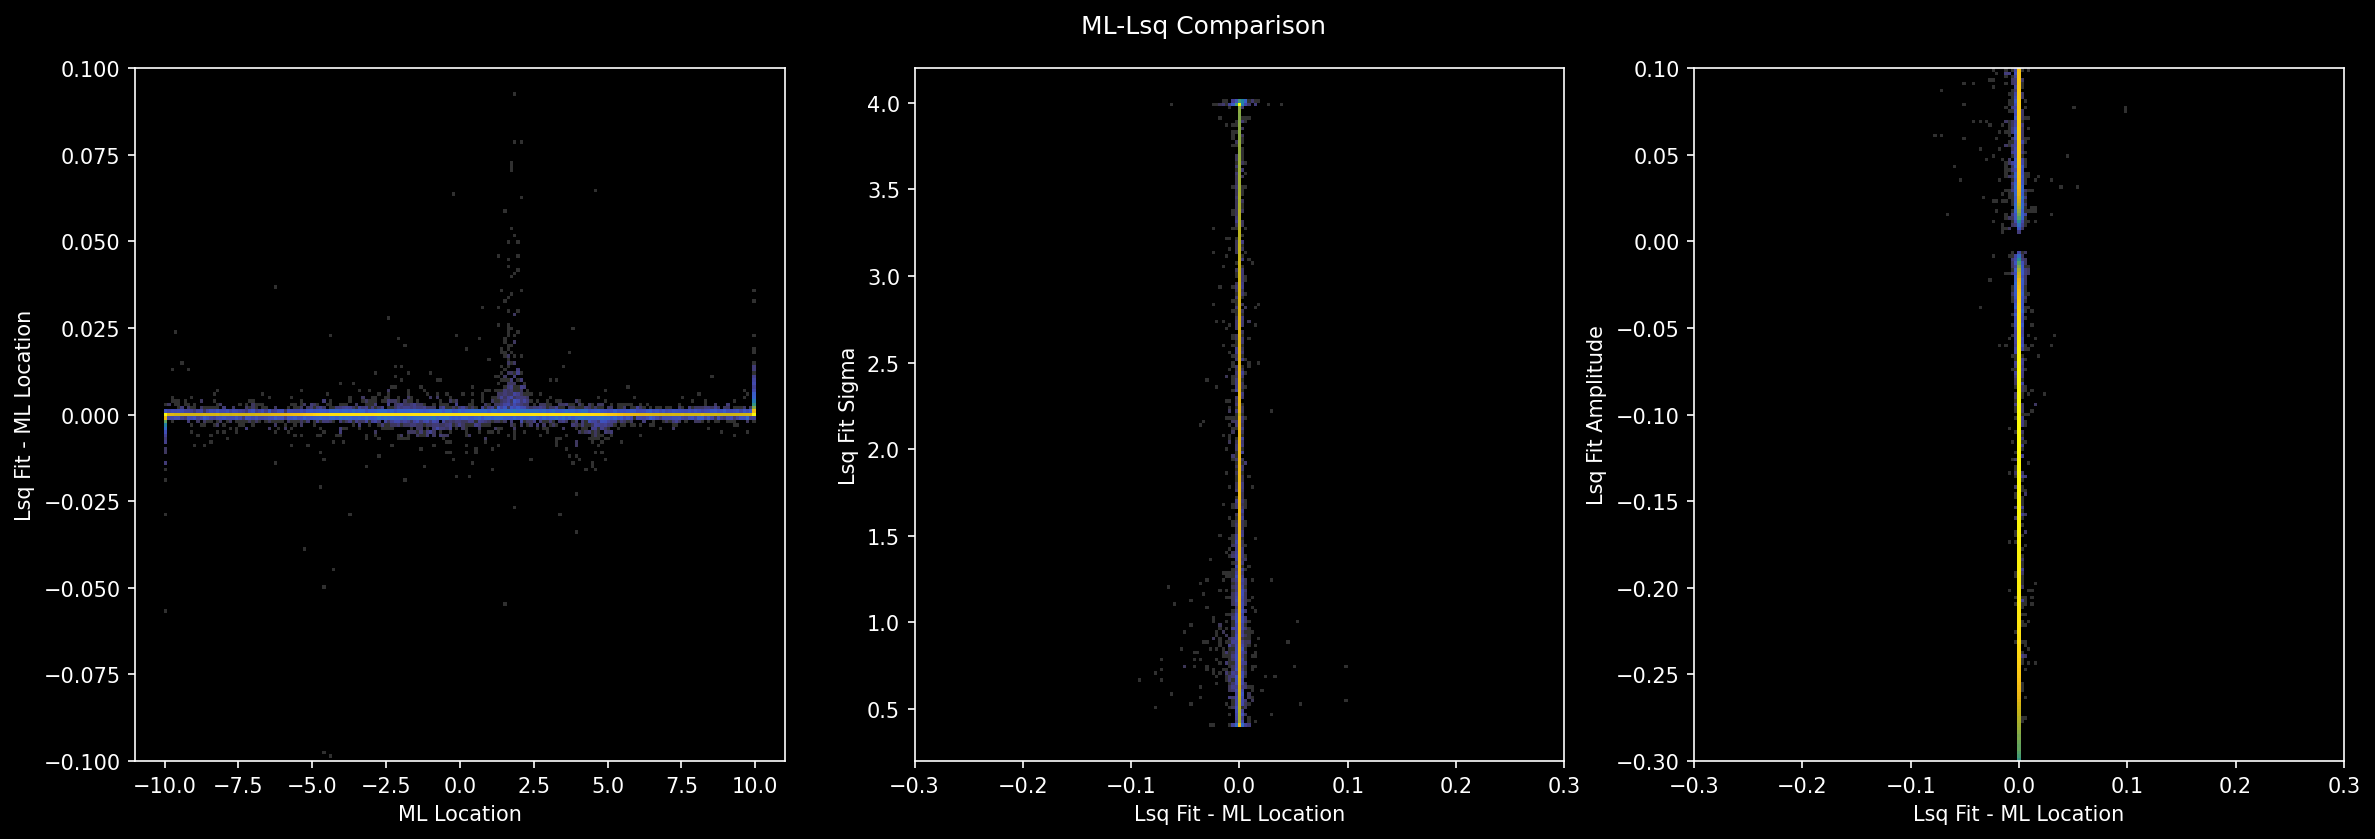

In [6]:
fig = plt.figure(figsize=(19,6),dpi=150)
plt.suptitle("ML-Lsq Comparison",y=0.94)
dwav=11
ax = fig.add_subplot(1,3,1)
nbin=201
ax.hist2d(-0.1 .*sout_mat[11,:],
    t_out[2,:].-(mu1.-0.1 .*sout_mat[11,:]),
    bins=(nbin,nbin),
    range=((-dwav,dwav),(-0.1,0.1)),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.set_xlim(-dwav,dwav)
ax.set_ylim(-0.1,0.1)
dwav=40

ax.set_xlabel("ML Location")
ax.set_ylabel("Lsq Fit - ML Location")


ax = fig.add_subplot(1,3,2)
nbin=201
ax.hist2d(mu1.-0.1 .*sout_mat[11,:].-t_out[2,:],t_out[3,:],
    bins=(nbin,nbin),
    range=((-0.3,0.3),(0.2,4.2)),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.set_xlim(-0.3,0.3)
ax.set_ylim(0.2,4.2)

ax.set_ylabel("Lsq Fit Sigma")
ax.set_xlabel("Lsq Fit - ML Location")


ax = fig.add_subplot(1,3,3)
nbin=201
ax.hist2d(mu1.-0.1 .*sout_mat[11,:].-t_out[2,:],t_out[1,:],
    bins=(nbin,nbin),
    range=((-0.3,0.3),(-0.3,0.1)),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.set_xlim(-0.3,0.3)
ax.set_ylim(-0.3,0.1)

ax.set_ylabel("Lsq Fit Amplitude")
ax.set_xlabel("Lsq Fit - ML Location");

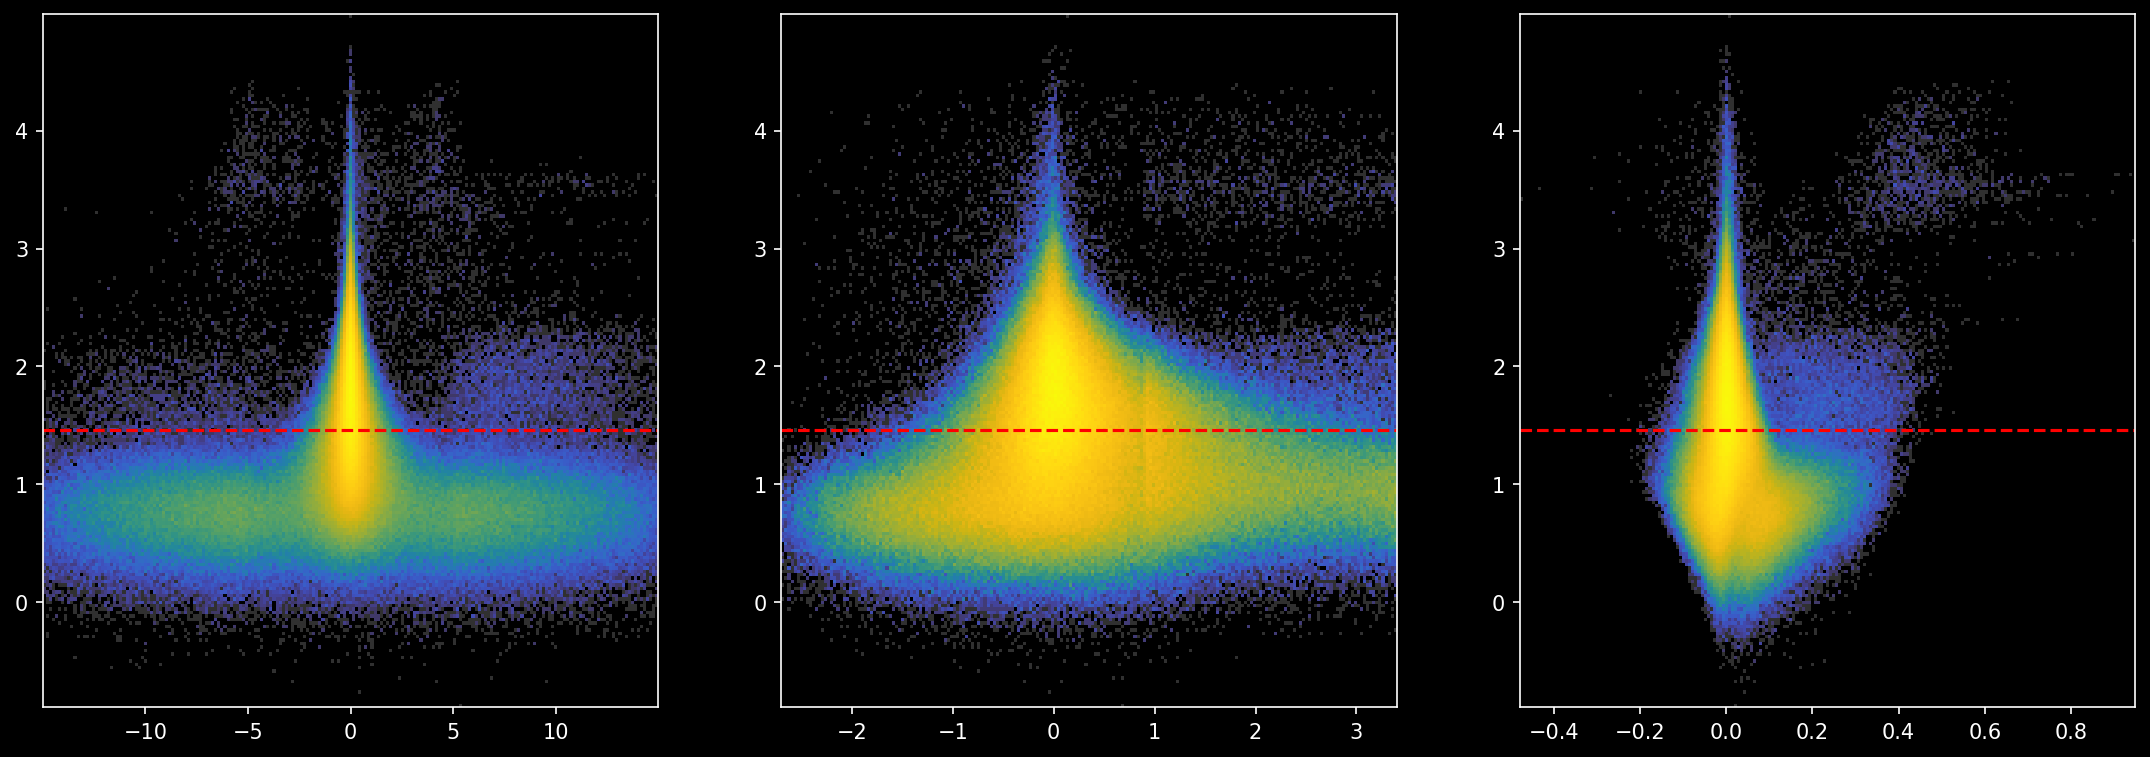

PyObject <matplotlib.lines.Line2D object at 0x14a361bd3610>

In [7]:
delthres = 1.46

fig = plt.figure(figsize=(18,6),dpi=150)
nbin = 201
ax = fig.add_subplot(1,3,1)
ax.hist2d(
    (mu1.-0.1 .*sout_mat[11,:]).-lamda_gt,
    log10.(-sout_mat[9,:].+covdet0),
    bins=(nbin,nbin),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.axhline(delthres,color="red",linestyle="--")

ax = fig.add_subplot(1,3,2)
ax.hist2d(
    sout_mat[12,:].-sigma_gt,
    log10.(-sout_mat[9,:].+covdet0),
    bins=(nbin,nbin),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.axhline(delthres,color="red",linestyle="--")

ax = fig.add_subplot(1,3,3)
ax.hist2d(
    t_out[1,:].-amp_gt,
    log10.(-sout_mat[9,:].+covdet0),
    bins=(nbin,nbin),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.axhline(delthres,color="red",linestyle="--")

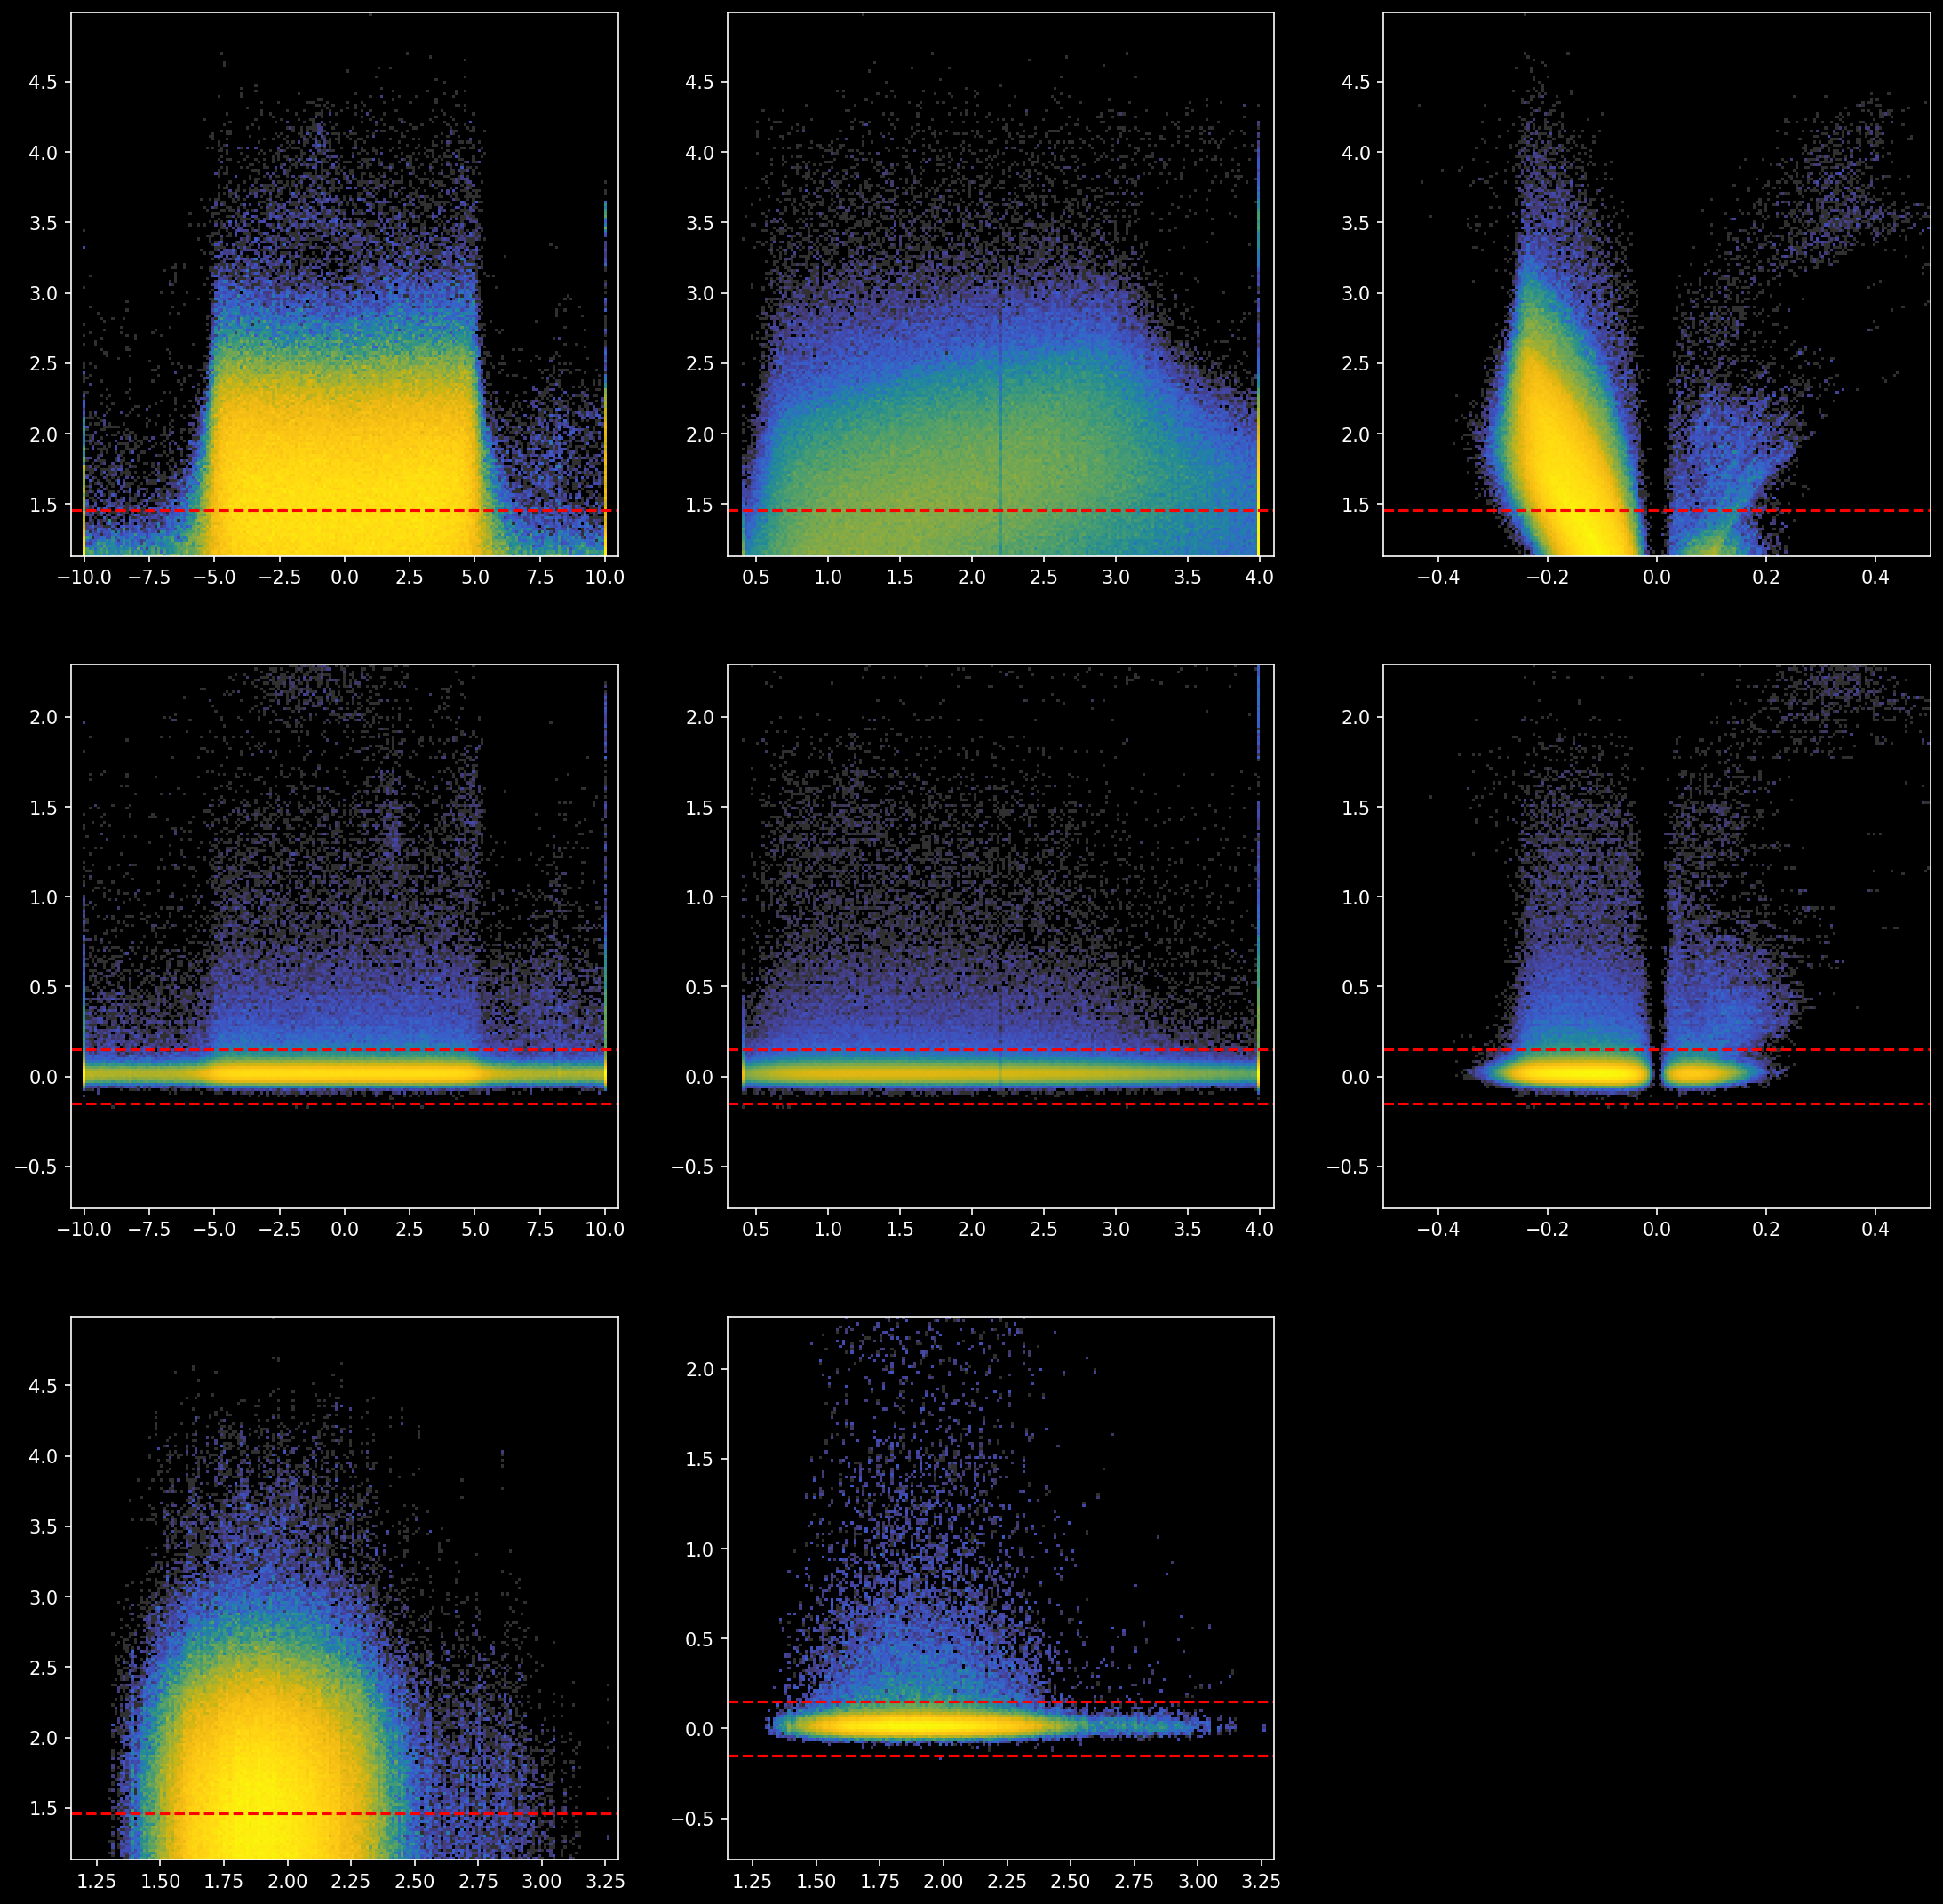

PyObject <matplotlib.lines.Line2D object at 0x14a36194a640>

In [8]:
delthres = 1.46

mint = minimum(filter(.!isnan,log10.(-sout_mat[9,:])))
maxt = maximum(filter(.!isnan,log10.(-sout_mat[9,:])))

fig = plt.figure(figsize=(18,18),dpi=150)
nbin = 191
ax = fig.add_subplot(3,3,1)
ax.hist2d(
    (-0.1 .*sout_mat[11,:]),
    log10.(-sout_mat[9,:].+covdet0),
    bins=(nbin,nbin),
    range=((-10.5,10.5),(mint,maxt)),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.axhline(delthres,color="red",linestyle="--")

ax = fig.add_subplot(3,3,2)
ax.hist2d(
    sout_mat[12,:],
    log10.(-sout_mat[9,:].+covdet0),
    bins=(nbin,nbin),
    range=((0.3,4.1),(mint,maxt)),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.axhline(delthres,color="red",linestyle="--")

ax = fig.add_subplot(3,3,3)
ax.hist2d(
    t_out[1,:],
    log10.(-sout_mat[9,:].+covdet0),
    bins=(nbin,nbin),
    cmap="cet_gouldian",
    range=((-0.5,0.5),(mint,maxt)),
    norm=mplcolors.LogNorm()
);

ax.axhline(delthres,color="red",linestyle="--")

chi2perdof  = 0.15

mint1 = minimum(filter(.!isnan,(log10.(sout_mat[15,:]./count(star_msk)))))
maxt1 = maximum(filter(.!isnan,(log10.(sout_mat[15,:]./count(star_msk)))))

ax = fig.add_subplot(3,3,4)
ax.hist2d(
    (-0.1 .*sout_mat[11,:]),
    (log10.(noisefact*sout_mat[15,:]./count(star_msk))),
    bins=(nbin,nbin),
    range=((-10.5,10.5),(mint1,maxt1)),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.axhline(chi2perdof,color="red",linestyle="--")
ax.axhline(-chi2perdof,color="red",linestyle="--")

ax = fig.add_subplot(3,3,5)
ax.hist2d(
    sout_mat[12,:],
    (log10.(noisefact*sout_mat[15,:]./count(star_msk))),
    bins=(nbin,nbin),
    range=((0.3,4.1),(mint1,maxt1)),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.axhline(chi2perdof,color="red",linestyle="--")
ax.axhline(-chi2perdof,color="red",linestyle="--")

ax = fig.add_subplot(3,3,6)
ax.hist2d(
    t_out[1,:],
    (log10.(noisefact*sout_mat[15,:]./count(star_msk))),
    bins=(nbin,nbin),
    range=((-0.5,0.5),(mint1,maxt1)),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.axhline(chi2perdof,color="red",linestyle="--")
ax.axhline(-chi2perdof,color="red",linestyle="--")


ax = fig.add_subplot(3,3,7)
ax.hist2d(
    log10.(SNR_lst),
    log10.(-sout_mat[9,:].+covdet0),
    bins=(nbin,nbin),
    range=((1.15,3.3),(mint,maxt)),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.axhline(delthres,color="red",linestyle="--")

ax = fig.add_subplot(3,3,8)
ax.hist2d(
    log10.(SNR_lst),
    (log10.(noisefact*sout_mat[15,:]./count(star_msk))),
    bins=(nbin,nbin),
    range=((1.15,3.3),(mint1,maxt1)),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.axhline(chi2perdof,color="red",linestyle="--")
ax.axhline(-chi2perdof,color="red",linestyle="--")

In [9]:
msk5 = (sout_mat[12,:].>=sigrng[11]) .& (sout_mat[12,:].!=sigrng[end-10])
msk5 .&= (sigrng[11] .<= t_out[3,:].<= sigrng[end-10])

msk5 .&= (srng[11] .< sout_mat[11,:].<srng[end-10])
msk5 .&= (srng[11] .< 10*(t_out[2,:].-mu1).<srng[end-10])

msk5 .&= (-chi2perdof .< (log10.(noisefact*sout_mat[15,:]./count(star_msk))).<chi2perdof)
count(msk5), count(msk5)/length(msk5)

(818890, 0.81889)

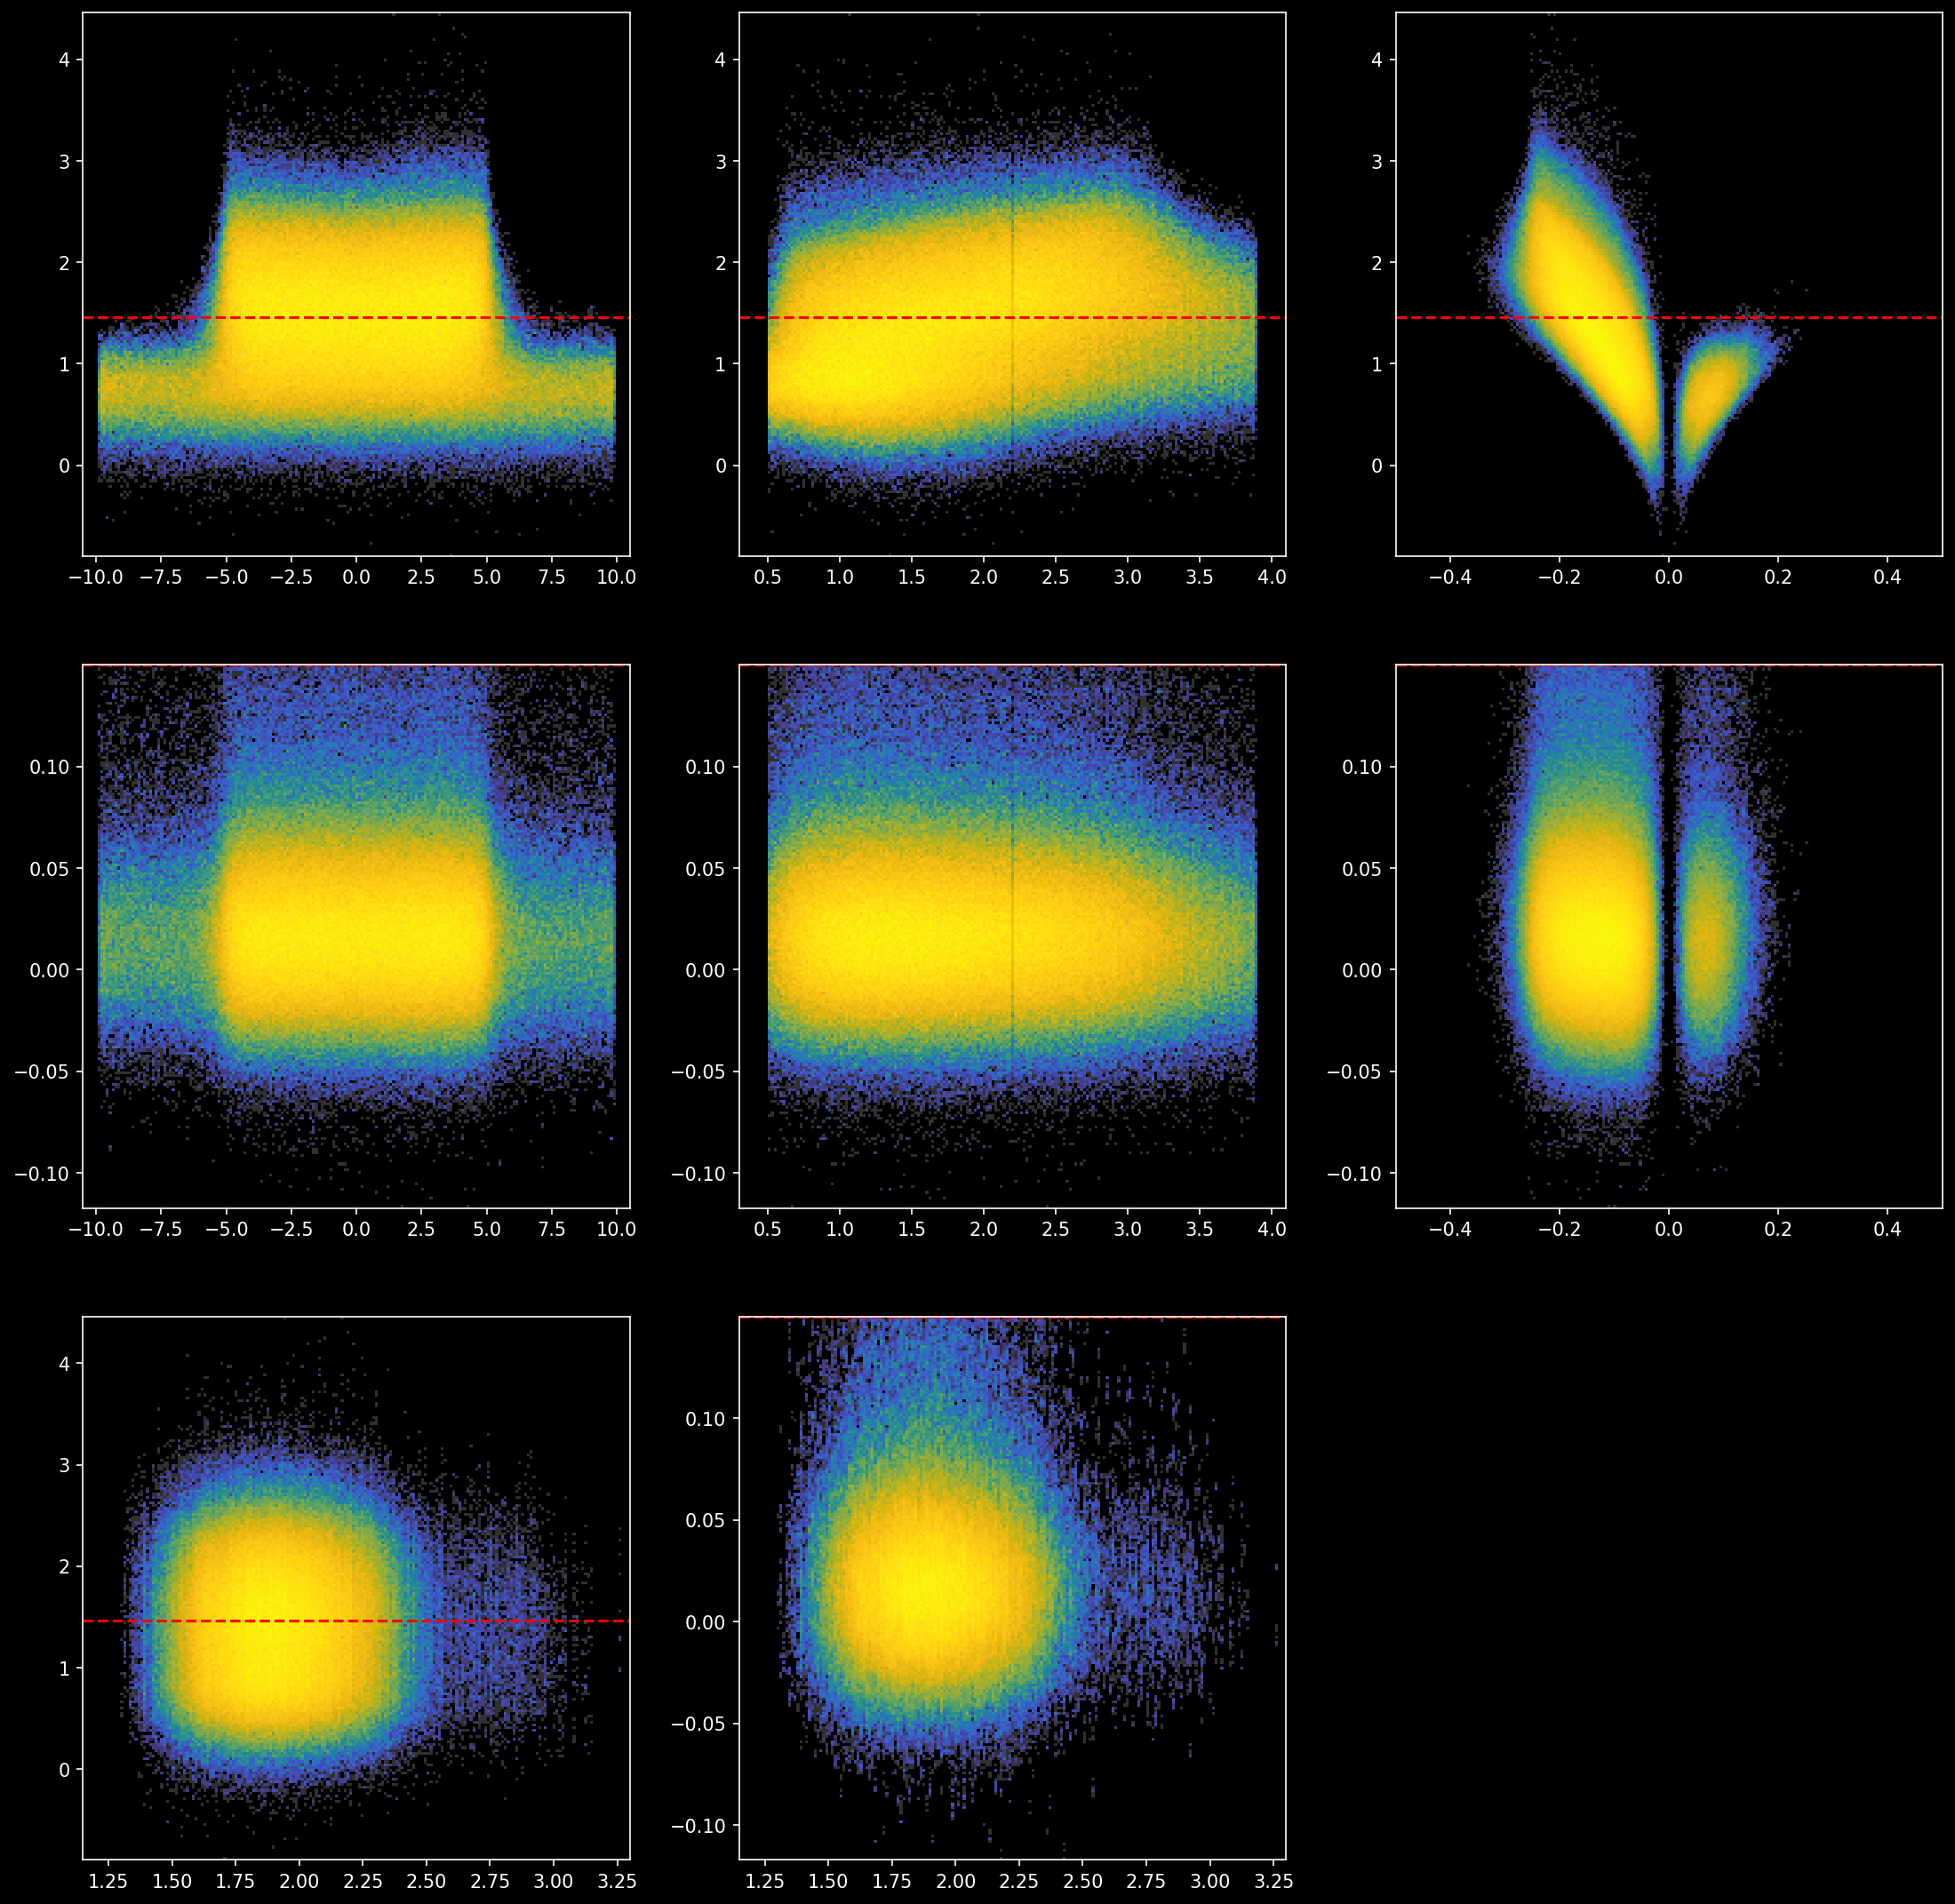

PyObject <matplotlib.lines.Line2D object at 0x14a36179d280>

In [10]:
mint = minimum(filter(.!isnan,log10.(-sout_mat[9,msk5].+covdet0)))
maxt = maximum(filter(.!isnan,log10.(-sout_mat[9,msk5].+covdet0)))

fig = plt.figure(figsize=(18,18),dpi=150)
nbin = 191
ax = fig.add_subplot(3,3,1)
ax.hist2d(
    (-0.1 .*sout_mat[11,msk5]),
    log10.(-sout_mat[9,msk5].+covdet0),
    bins=(nbin,nbin),
    range=((-10.5,10.5),(mint,maxt)),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.axhline(delthres,color="red",linestyle="--")

ax = fig.add_subplot(3,3,2)
ax.hist2d(
    sout_mat[12,msk5],
    log10.(-sout_mat[9,msk5].+covdet0),
    bins=(nbin,nbin),
    range=((0.3,4.1),(mint,maxt)),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.axhline(delthres,color="red",linestyle="--")

ax = fig.add_subplot(3,3,3)
ax.hist2d(
    t_out[1,msk5],
    log10.(-sout_mat[9,msk5].+covdet0),
    bins=(nbin,nbin),
    cmap="cet_gouldian",
    range=((-0.5,0.5),(mint,maxt)),
    norm=mplcolors.LogNorm()
);

ax.axhline(delthres,color="red",linestyle="--")

chi2perdof  = 0.15

mint1 = minimum(filter(.!isnan,(log10.(noisefact*sout_mat[15,msk5]./count(star_msk)))))
maxt1 = maximum(filter(.!isnan,(log10.(noisefact*sout_mat[15,msk5]./count(star_msk)))))

ax = fig.add_subplot(3,3,4)
ax.hist2d(
    (-0.1 .*sout_mat[11,msk5]),
    (log10.(noisefact*sout_mat[15,msk5]./count(star_msk))),
    bins=(nbin,nbin),
    range=((-10.5,10.5),(mint1,maxt1)),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.axhline(chi2perdof,color="red",linestyle="--")
ax.axhline(-chi2perdof,color="red",linestyle="--")

ax = fig.add_subplot(3,3,5)
ax.hist2d(
    sout_mat[12,msk5],
    (log10.(noisefact*sout_mat[15,msk5]./count(star_msk))),
    bins=(nbin,nbin),
    range=((0.3,4.1),(mint1,maxt1)),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.axhline(chi2perdof,color="red",linestyle="--")
ax.axhline(-chi2perdof,color="red",linestyle="--")

ax = fig.add_subplot(3,3,6)
ax.hist2d(
    t_out[1,msk5],
    (log10.(noisefact*sout_mat[15,msk5]./count(star_msk))),
    bins=(nbin,nbin),
    range=((-0.5,0.5),(mint1,maxt1)),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.axhline(chi2perdof,color="red",linestyle="--")
ax.axhline(-chi2perdof,color="red",linestyle="--")


ax = fig.add_subplot(3,3,7)
ax.hist2d(
    log10.(SNR_lst[msk5]),
    log10.(-sout_mat[9,msk5].+covdet0),
    bins=(nbin,nbin),
    range=((1.15,3.3),(mint,maxt)),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.axhline(delthres,color="red",linestyle="--")

ax = fig.add_subplot(3,3,8)
ax.hist2d(
    log10.(SNR_lst[msk5]),
    (log10.(noisefact*sout_mat[15,msk5]./count(star_msk))),
    bins=(nbin,nbin),
    range=((1.15,3.3),(mint1,maxt1)),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.axhline(chi2perdof,color="red",linestyle="--")
ax.axhline(-chi2perdof,color="red",linestyle="--")

In [11]:
delthres = 1.46
noisefact = 3.6;

msk5 = (sout_mat[12,:].>=sigrng[11]) .& (sout_mat[12,:].!=sigrng[end-10])
msk5 .&= (sigrng[11] .<= t_out[3,:].<= sigrng[end-10])

msk5 .&= (srng[11] .< sout_mat[11,:].<srng[end-10])
msk5 .&= (srng[11] .< 10*(t_out[2,:].-mu1).<srng[end-10])

msk5 .&= .!isnan.(sout_mat[19,:]);

msk5 .&= (-chi2perdof .< (log10.(noisefact*sout_mat[15,:]./count(star_msk))).<chi2perdof)
msk5 .&= (log10.(-sout_mat[9,:].+covdet0).>delthres)
count(msk5), count(msk5)/length(msk5)

(374751, 0.374751)

In [18]:
serialize("../$foldname"*"_wu/inject_msk.jdat",msk5)

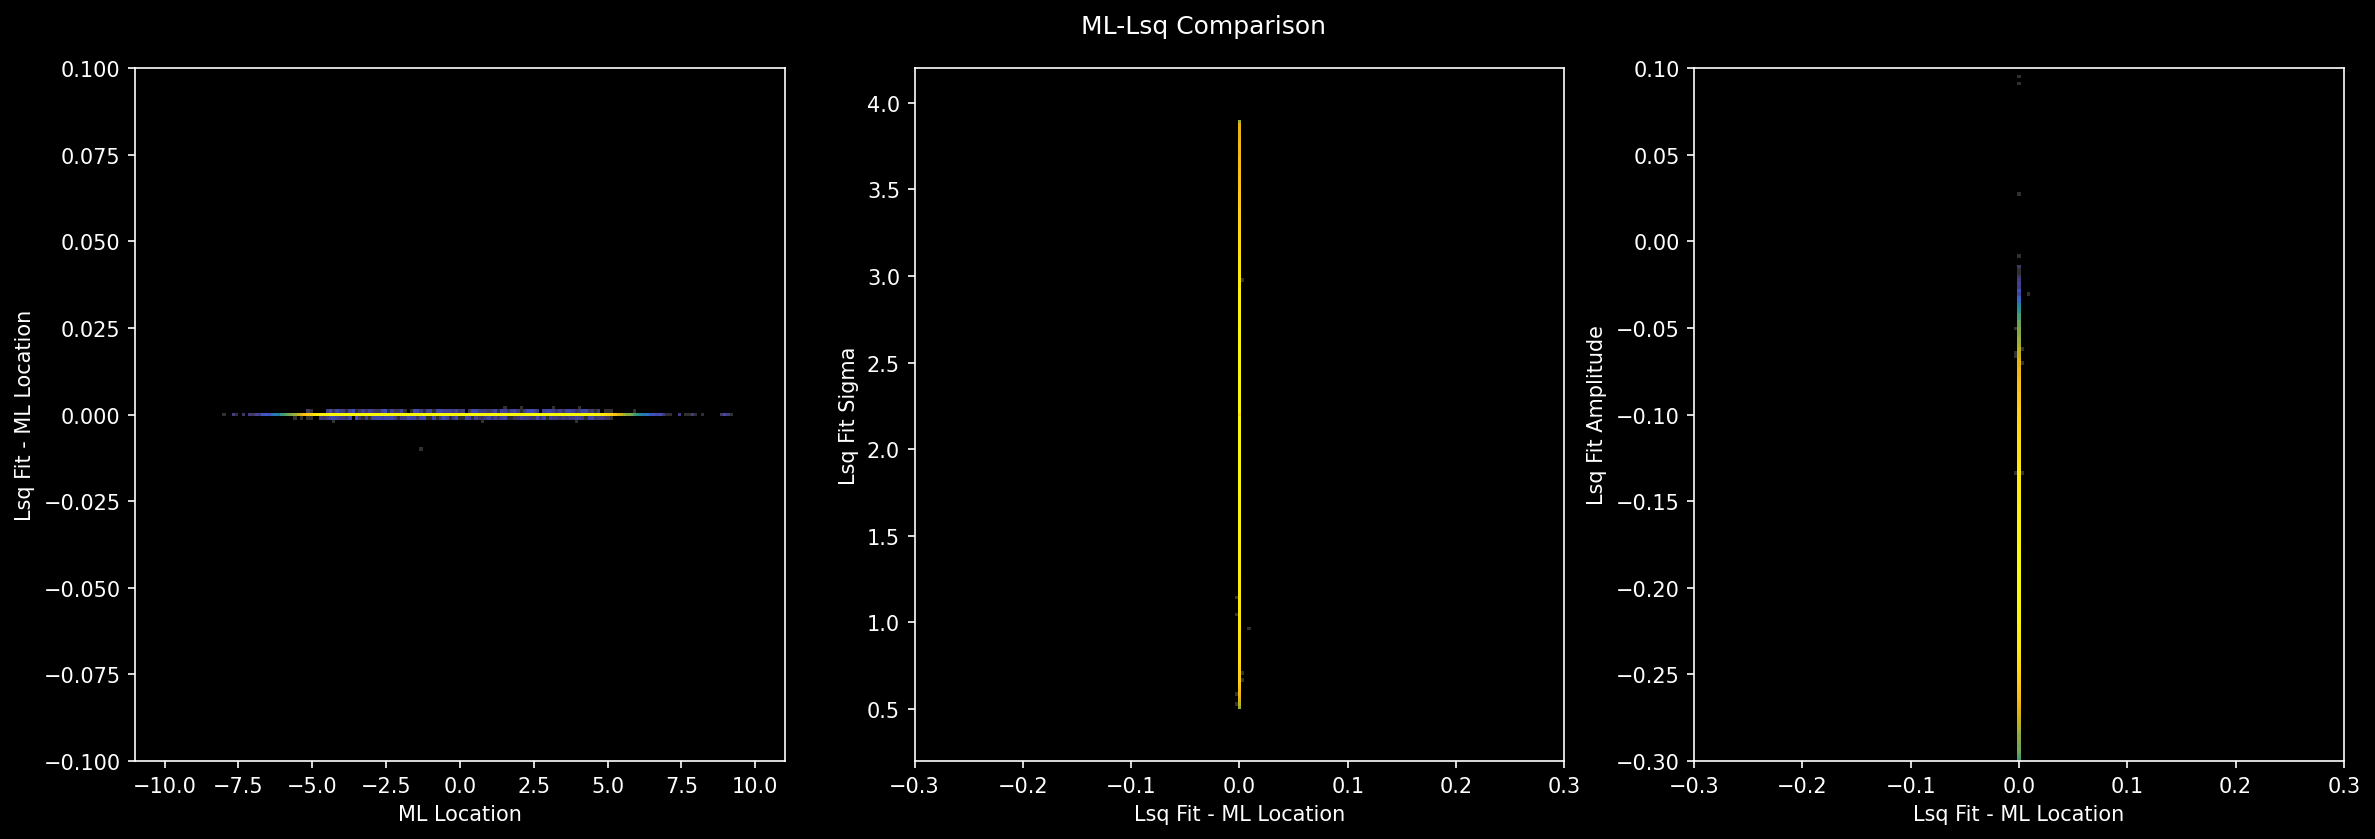

In [12]:
fig = plt.figure(figsize=(19,6),dpi=150)
plt.suptitle("ML-Lsq Comparison",y=0.94)
dwav=11
ax = fig.add_subplot(1,3,1)
nbin=201
ax.hist2d(-0.1 .*sout_mat[11,msk5],
    t_out[2,msk5].-(mu1.-0.1 .*sout_mat[11,msk5]),
    bins=(nbin,nbin),
    range=((-dwav,dwav),(-0.1,0.1)),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.set_xlim(-dwav,dwav)
ax.set_ylim(-0.1,0.1)
dwav=40

ax.set_xlabel("ML Location")
ax.set_ylabel("Lsq Fit - ML Location")


ax = fig.add_subplot(1,3,2)
nbin=201
ax.hist2d(mu1.-0.1 .*sout_mat[11,msk5].-t_out[2,msk5],t_out[3,msk5],
    bins=(nbin,nbin),
    range=((-0.3,0.3),(0.2,4.2)),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.set_xlim(-0.3,0.3)
ax.set_ylim(0.2,4.2)

ax.set_ylabel("Lsq Fit Sigma")
ax.set_xlabel("Lsq Fit - ML Location")


ax = fig.add_subplot(1,3,3)
nbin=201
ax.hist2d(mu1.-0.1 .*sout_mat[11,msk5].-t_out[2,msk5],t_out[1,msk5],
    bins=(nbin,nbin),
    range=((-0.3,0.3),(-0.3,0.1)),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.set_xlim(-0.3,0.3)
ax.set_ylim(-0.3,0.1)

ax.set_ylabel("Lsq Fit Amplitude")
ax.set_xlabel("Lsq Fit - ML Location");

In [13]:
mu0, sig0 = 1.8543427809345272, 0.42611151059771135
mu1, sig1 = 8623.472591060325, 0.9744612516955377;
xmin0 = 8460
xmax0 = 8700
wavex = xmin0:0.1:xmax0
cwave = 8623.54
wavebad = [cwave-5.85,cwave-4.85,cwave-2.8,cwave-1.9,cwave+1.7]
waveknown = [8623.97];
dwav = 40
maxw = maximum(wavex[star_msk])
minw = minimum(wavex[star_msk]);

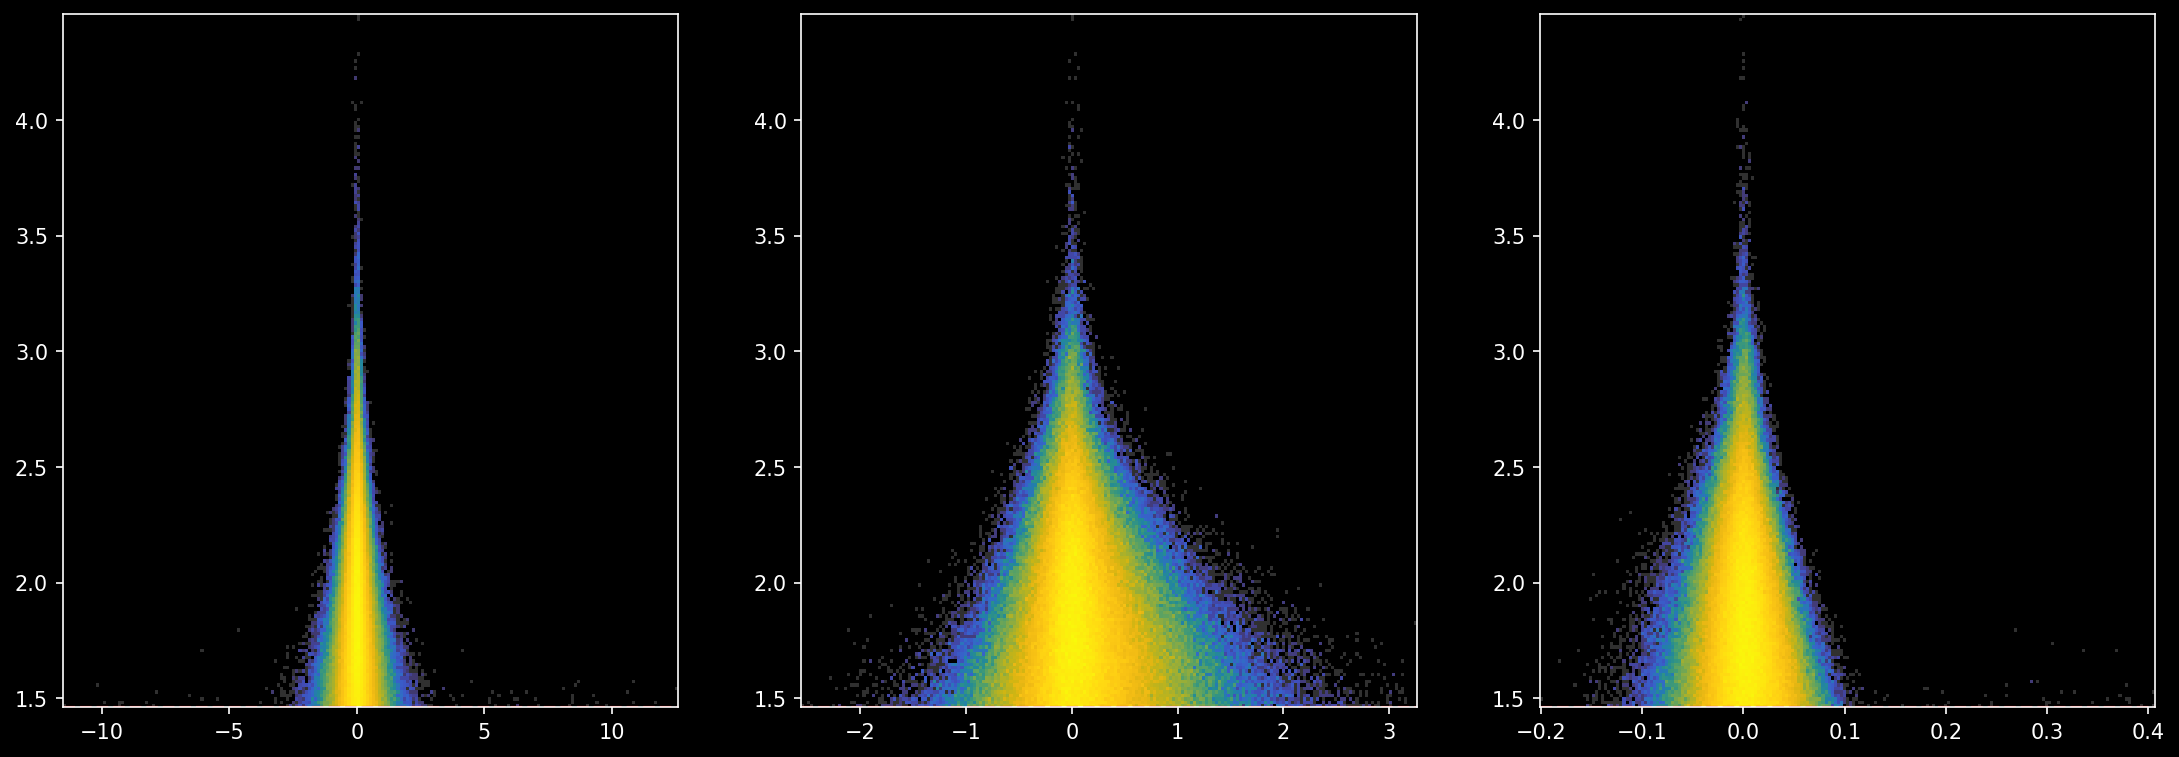

PyObject <matplotlib.lines.Line2D object at 0x14a361472280>

In [14]:
fig = plt.figure(figsize=(18,6),dpi=150)
nbin = 201
ax = fig.add_subplot(1,3,1)
ax.hist2d(
    (cwave_cent.-0.1 .*sout_mat[11,msk5]).-lamda_gt[msk5],
    log10.(-sout_mat[9,msk5].+covdet0),
    bins=(nbin,nbin),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.axhline(delthres,color="red",linestyle="--")

ax = fig.add_subplot(1,3,2)
ax.hist2d(
    sout_mat[12,msk5].-sigma_gt[msk5],
    log10.(-sout_mat[9,msk5].+covdet0),
    bins=(nbin,nbin),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.axhline(delthres,color="red",linestyle="--")

ax = fig.add_subplot(1,3,3)
ax.hist2d(
    t_out[1,msk5].-amp_gt[msk5],
    log10.(-sout_mat[9,msk5].+covdet0),
    bins=(nbin,nbin),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.axhline(delthres,color="red",linestyle="--")

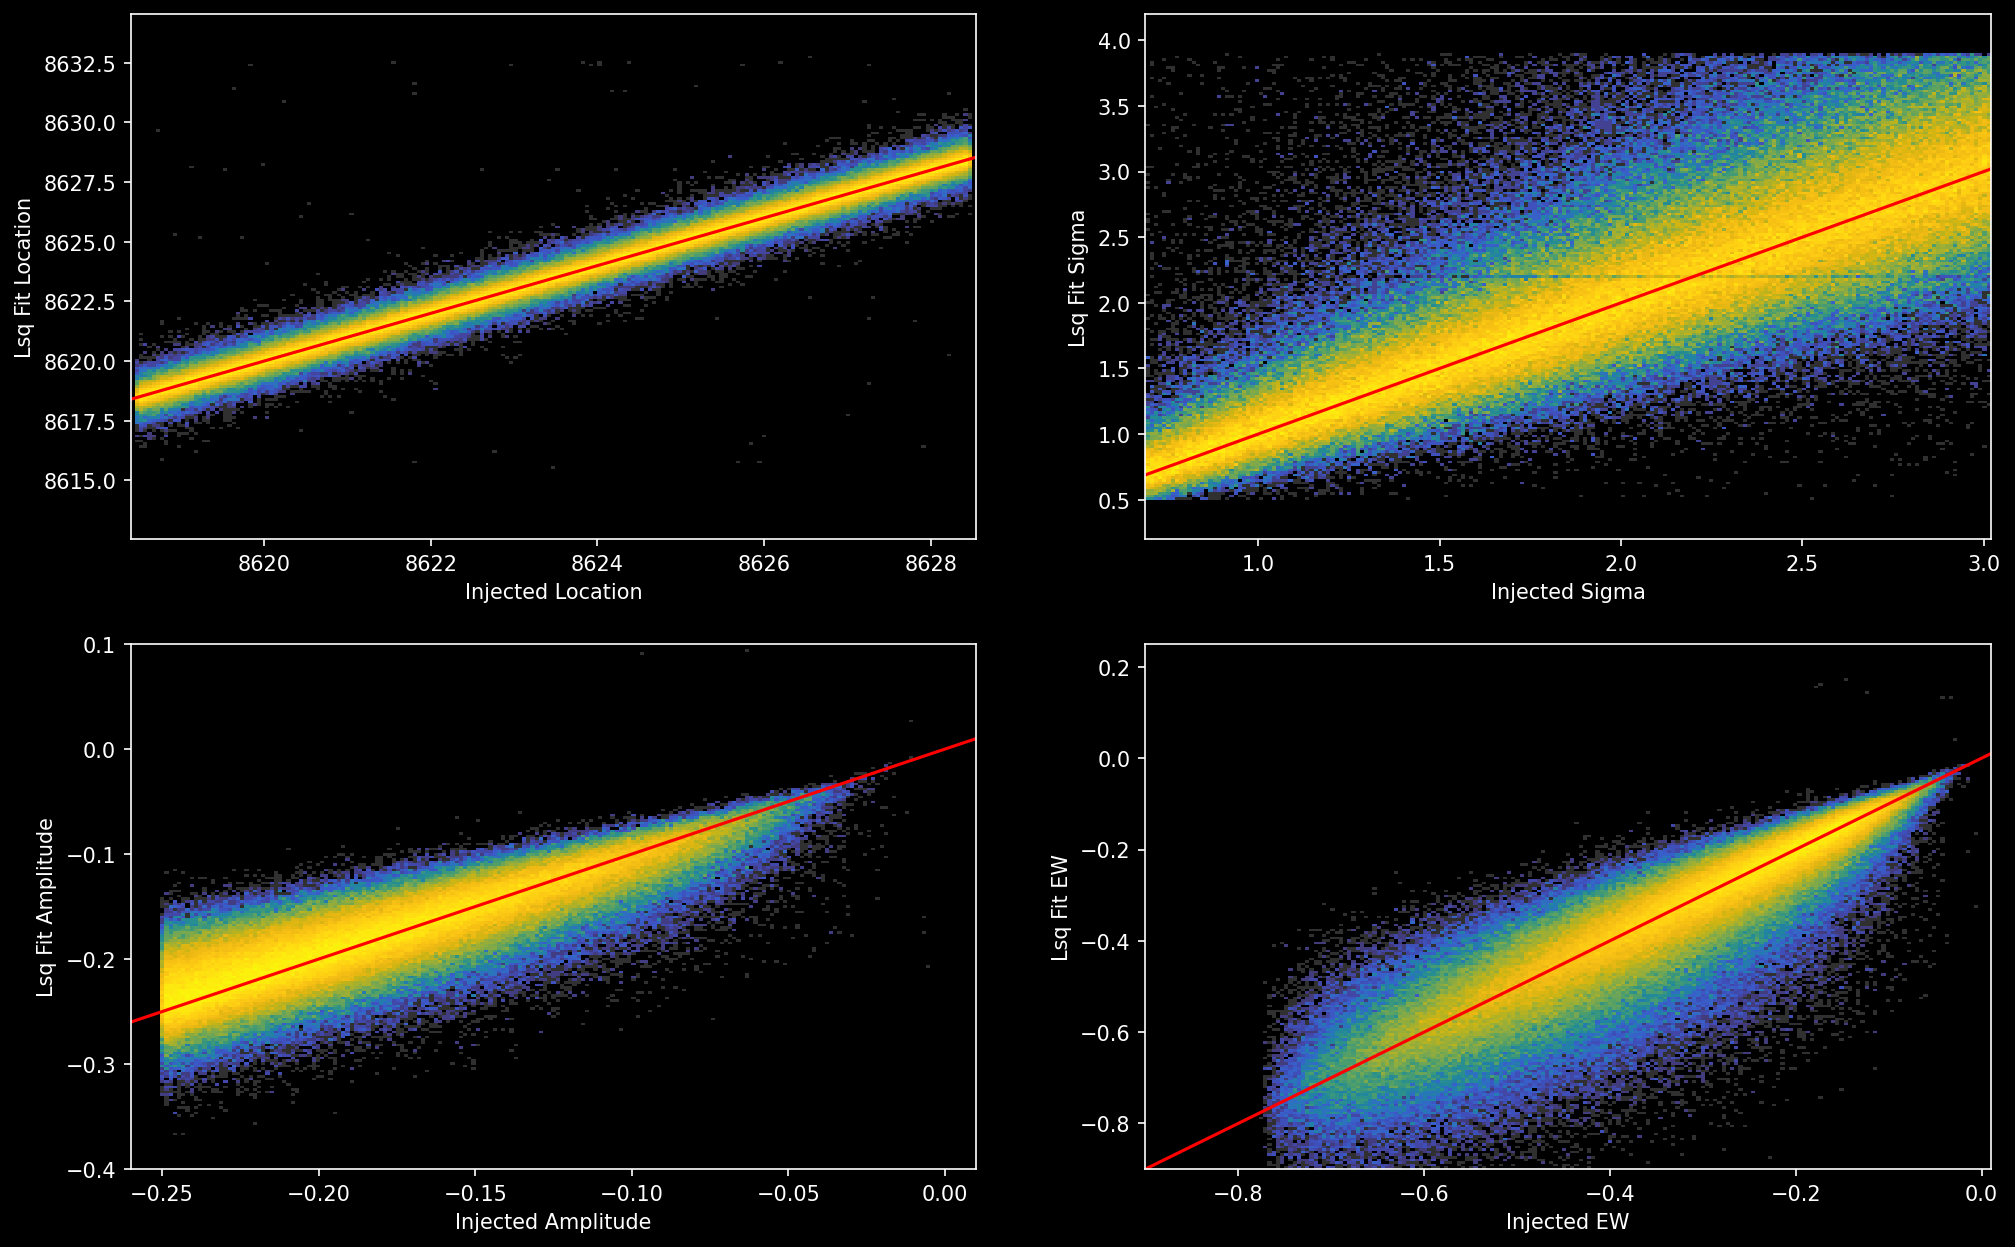

In [15]:
fig = plt.figure(figsize=(16,10),dpi=150)
ax = fig.add_subplot(2,2,1)
nbin=201
ax.hist2d(lamda_gt[msk5],t_out[2,msk5],
    bins=(nbin,nbin),
    range=(((cwave_cent-5*sig1-0.2, cwave_cent+5*sig1+0.2),(cwave-11,cwave+11))),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.set_xlim(mu1-5*sig1-0.2, mu1+5*sig1+0.2)
ax.set_ylim(cwave-11,cwave+11)
    
ax.set_xlabel("Injected Location")
ax.set_ylabel("Lsq Fit Location")

ax.axline((0,0),slope=1, color="red")


ax = fig.add_subplot(2,2,2)
nbin=201
ax.hist2d(sigma_gt[msk5],t_out[3,msk5],
    bins=(nbin,nbin),
    range=(((mu0-2.5*sig0-0.1, mu0+2.5*sig0+0.1),(0.2,4.2))),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.set_xlim(mu0-2.5*sig0-0.1, mu0+2.5*sig0+0.1)
ax.set_ylim(0.2,4.2)

ax.axline((0,0),slope=1, color="red")

ax.set_xlabel("Injected Sigma")
ax.set_ylabel("Lsq Fit Sigma")

ax = fig.add_subplot(2,2,3)
nbin=201
ax.hist2d(amp_gt[msk5],t_out[1,msk5],
    bins=(nbin,nbin),
    range=(((-0.26,0.01),(-0.4,0.1))),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.set_xlim(-0.26,0.01)
ax.set_ylim(-0.4,0.1)

ax.axline((0,0),slope=1, color="red")

ax.set_xlabel("Injected Amplitude")
ax.set_ylabel("Lsq Fit Amplitude");

ax = fig.add_subplot(2,2,4)
nbin=201
ax.hist2d(amp_gt[msk5].*sigma_gt[msk5],t_out[1,msk5].*t_out[3,msk5],
    bins=(nbin,nbin),
    range=(((-0.9,0.01),(-0.9,0.25))),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.set_xlim(-0.9,0.01)
ax.set_ylim(-0.9,0.25)

ax.axline((0,0),slope=1, color="red")

ax.set_xlabel("Injected EW")
ax.set_ylabel("Lsq Fit EW");

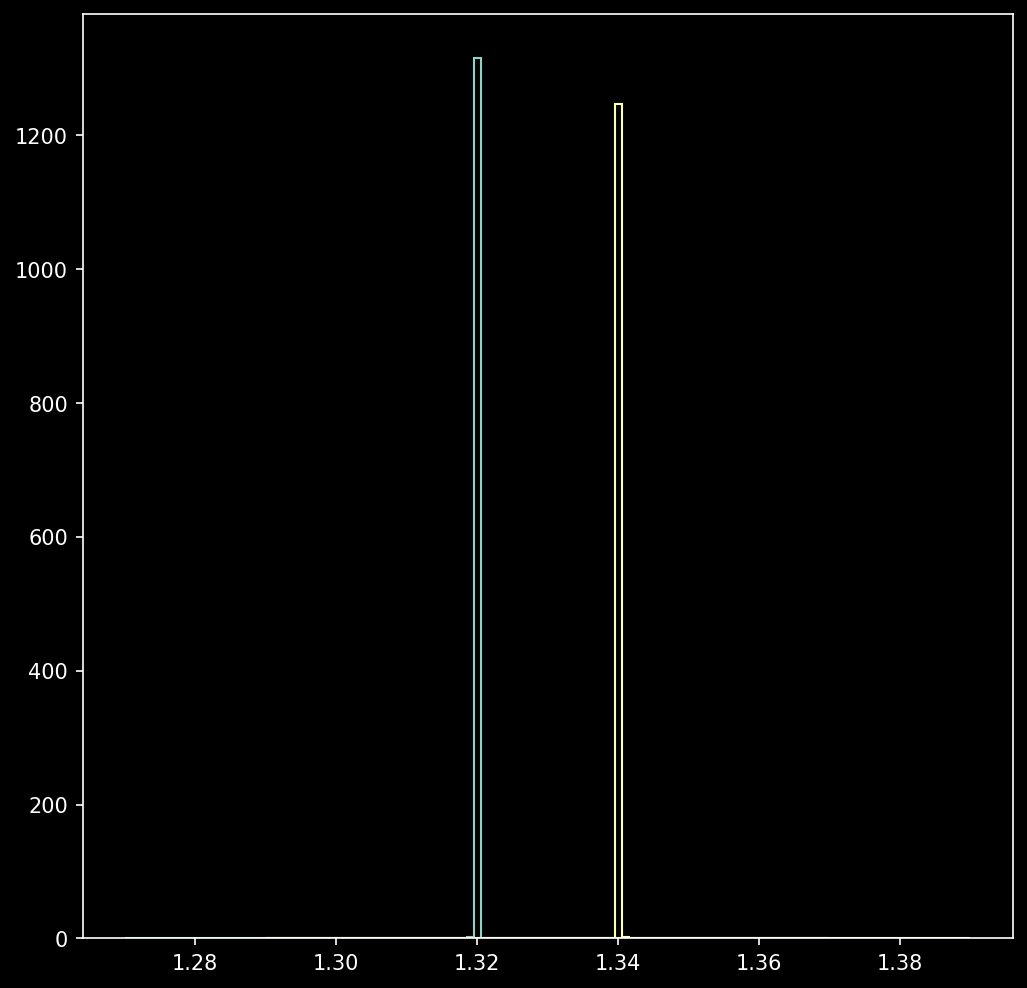

In [16]:
sigma0 = 1.32
fig = plt.figure(figsize=(8,8),dpi=150)
ax = fig.add_subplot(1,1,1)
tmsk = (sout_mat[12,:] .== sigma0) .& msk5;
ax.hist(
    t_out[3,tmsk],
    bins=101,
    range=(sigma0-0.05,sigma0+0.05),
    histtype="step"
);
tmsk = (sout_mat[12,:] .== sigma0+0.02) .& msk5;
ax.hist(
    t_out[3,tmsk],
    bins=101,
    range=(sigma0+0.02-0.05,sigma0+0.02+0.05),
    histtype="step"
);

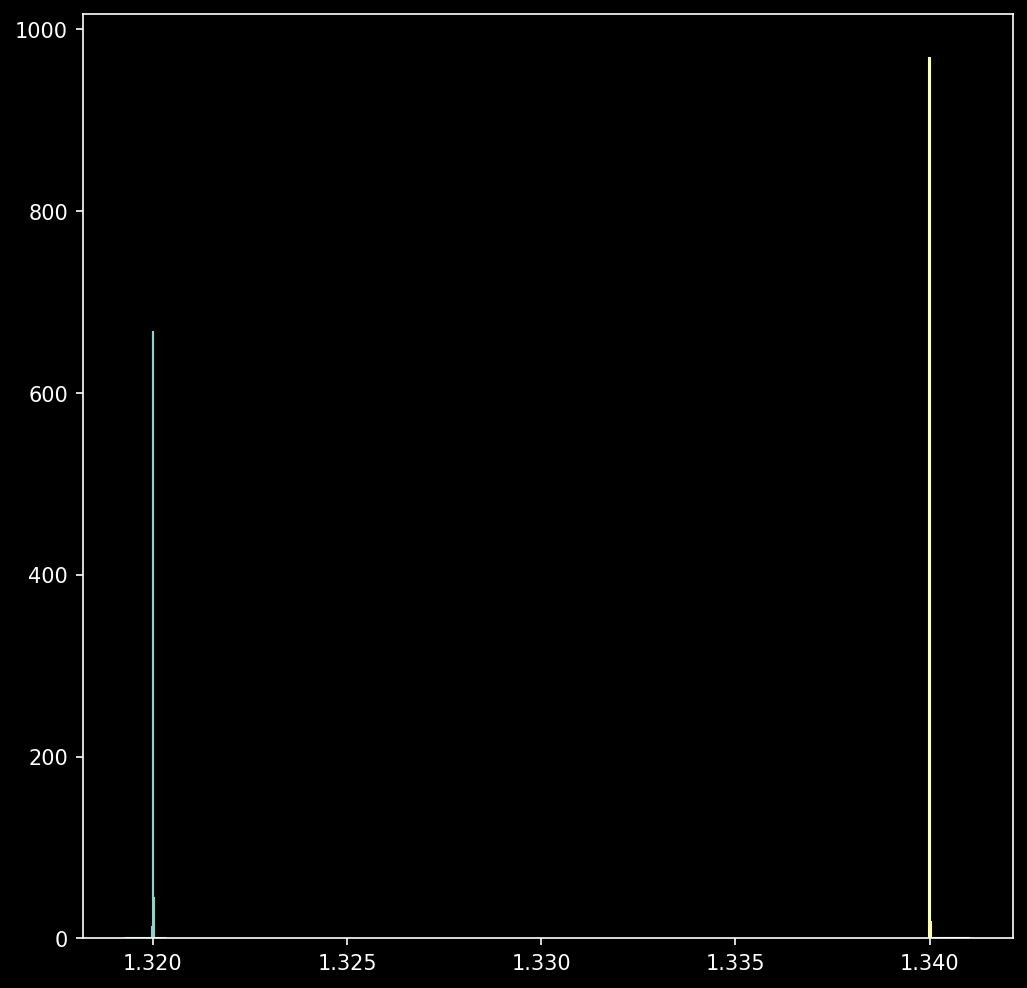

In [17]:
sigma0 = 1.32
fig = plt.figure(figsize=(8,8),dpi=150)
ax = fig.add_subplot(1,1,1)
tmsk = (sout_mat[12,:] .== sigma0) .& msk5;
widx = 0.001
ax.hist(
    t_out[3,tmsk],
    bins=101,
    # range=(sigma0-widx,sigma0+widx),
    histtype="step"
);
tmsk = (sout_mat[12,:] .== sigma0+0.02) .& msk5;
ax.hist(
    t_out[3,tmsk],
    bins=101,
    # range=(sigma0+0.02-widx,sigma0+0.02+widx),
    histtype="step"
);

In [18]:
fiqr(x) = iqr(x)./1.34896;

In [19]:
iqr_out = zeros(length(sigrng))
med_out = zeros(length(sigrng))

for (indx,ival) in enumerate(sigrng)
    try
        tmsk = (sout_mat[12,msk5] .== ival);
        iqr_out[indx] = fiqr(t_out[3,msk5][tmsk])
        med_out[indx] = median(t_out[3,msk5][tmsk])
    catch
        iqr_out[indx] = NaN
        med_out[indx] = NaN
    end
end

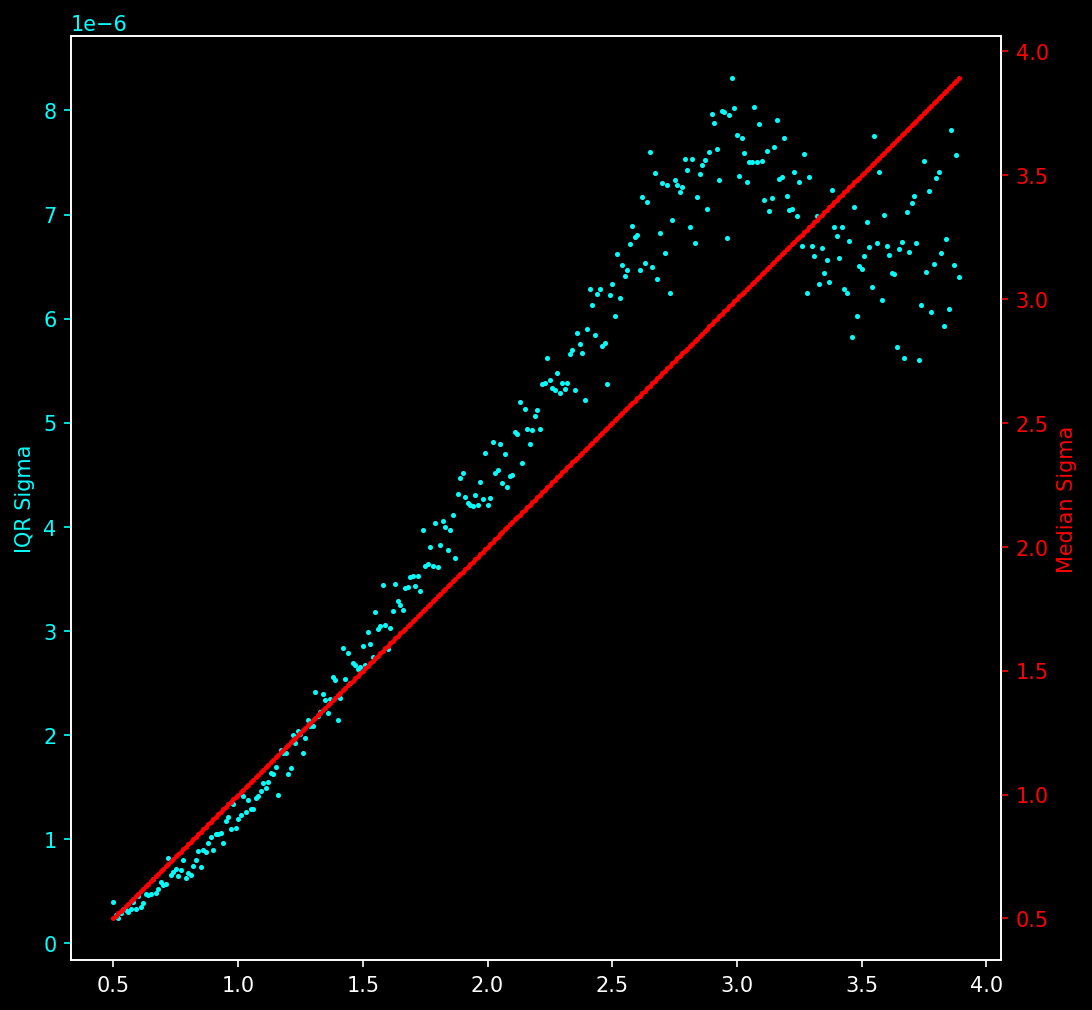

PyObject Text(1057.2083333333333, 0.5, 'Median Sigma')

In [20]:
fig = plt.figure(figsize=(8,8),dpi=150)
ax = fig.add_subplot(1,1,1)
ax.scatter(sigrng,iqr_out,color="cyan",s=2)
ax.yaxis.label.set_color("cyan")
ax.tick_params(axis="y", colors="cyan")
ax.set_ylabel("IQR Sigma")

ax1 = ax.twinx()
ax1.scatter(sigrng,med_out,color="red",s=2)
ax1.yaxis.label.set_color("red")
ax1.tick_params(axis="y", colors="red")
ax1.set_ylabel("Median Sigma")

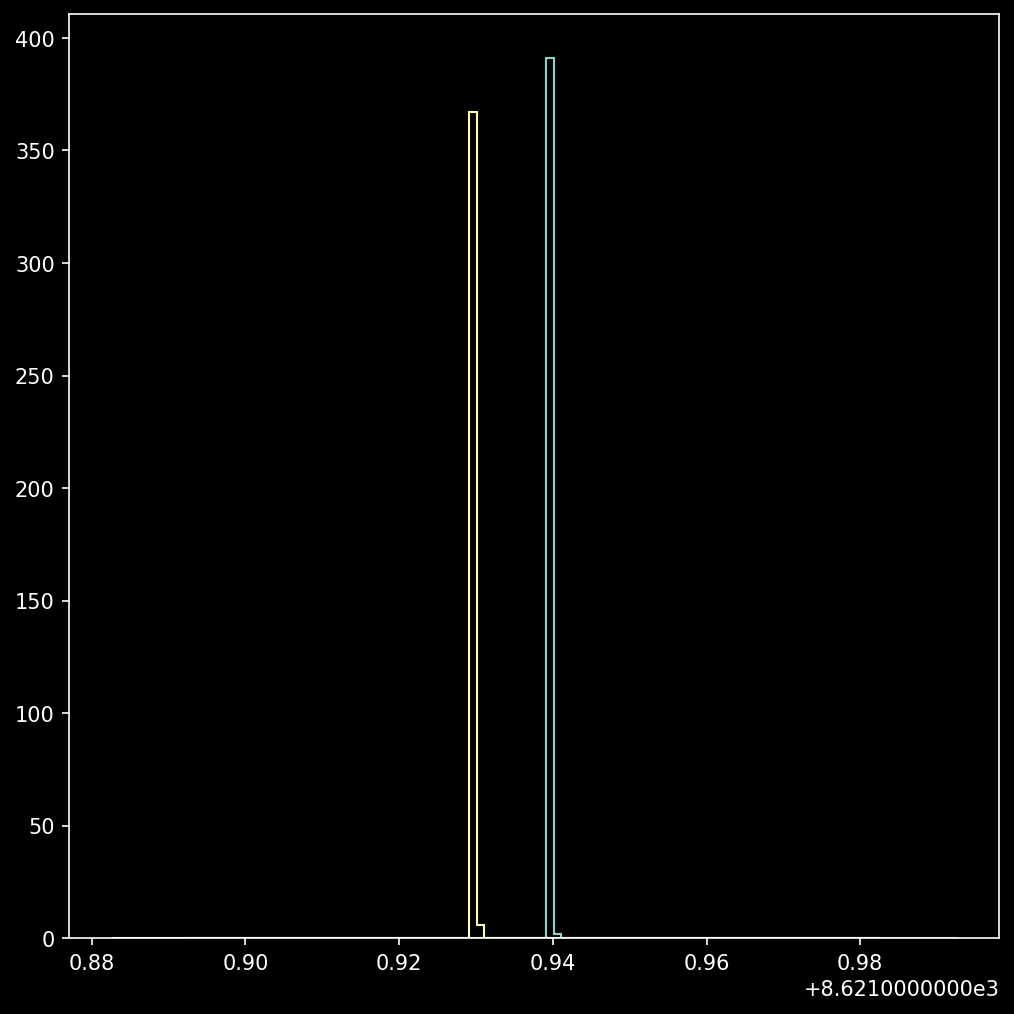

In [21]:
srng0 = 15.3
fig = plt.figure(figsize=(8,8),dpi=150)
ax = fig.add_subplot(1,1,1)
tmsk = (sout_mat[11,:] .== srng0) .& msk5;
ax.hist(
    t_out[2,tmsk],
    bins=101,
    range=(mu1.-0.1 .*(srng0+0.5),mu1.-0.1 .*(srng0-0.5)),
    histtype="step"
);
tmsk = (sout_mat[11,:] .== srng0+0.1) .& msk5;
ax.hist(
    t_out[2,tmsk],
    bins=101,
    range=(mu1.-0.1 .*(srng0+0.1+0.5),mu1.-0.1 .*(srng0+0.1-0.5)),
    histtype="step"
);

In [22]:
function sqrt_AKS(x)
    if x<0
        return NaN
    else
        return sqrt(x)
    end
end

fiqr(x) = iqr(x)./1.34896;

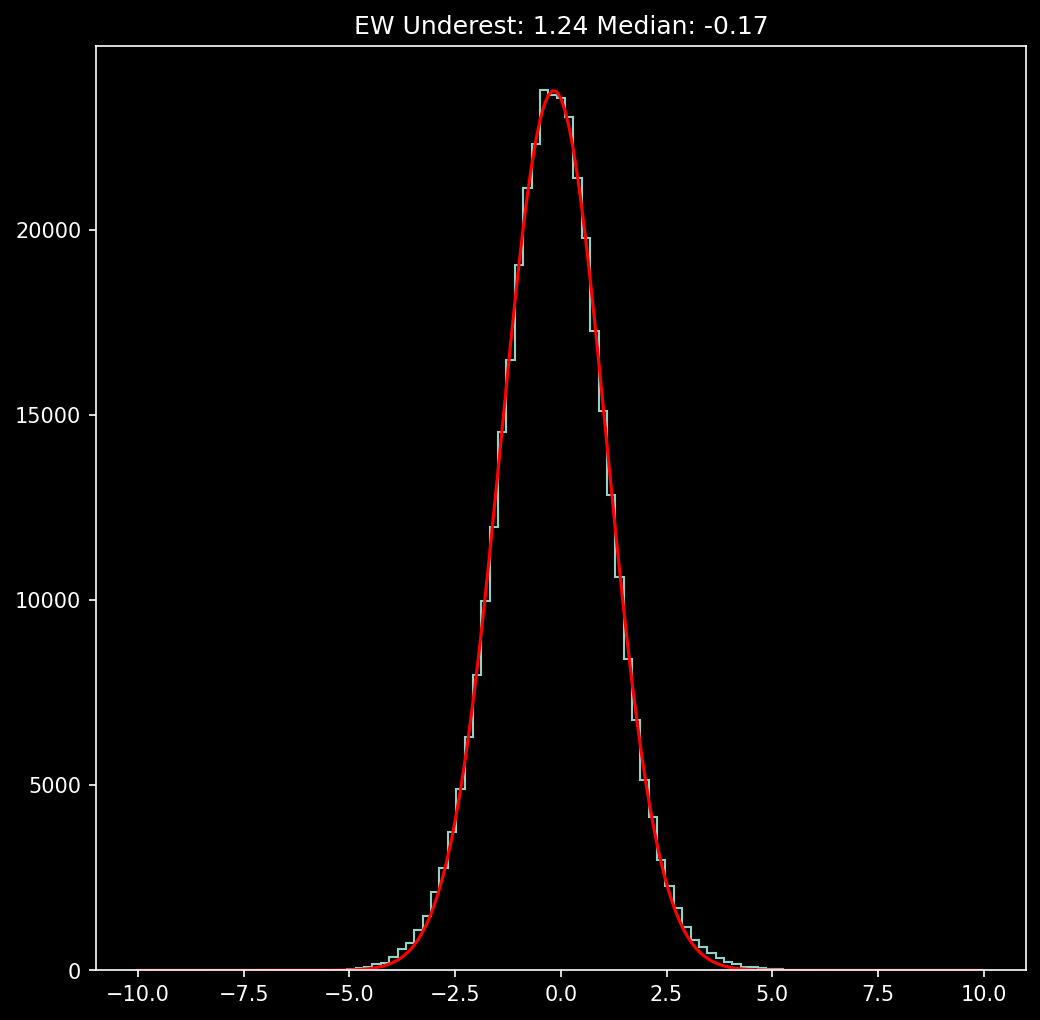

PyObject Text(0.5, 1.0, 'EW Underest: 1.24 Median: -0.17')

In [23]:
est_ew = sout_mat[21,msk5]
err_ew = sout_mat[22,msk5]
gt_ew = (amp_gt.*sigma_gt)[msk5];
z = (est_ew.-gt_ew)./err_ew;

fig = plt.figure(figsize=(8,8),dpi=150)
ax = fig.add_subplot(1,1,1)
img = ax.hist(
    z,
    bins=101,
    range=(-10,10),
    histtype="step"
);

std = fiqr(filter(.!isnan,z))
med0 = median(filter(.!isnan,z))
x = -10:0.1:10
ax.plot(x,Distributions.pdf.(Normal(med0,std),x).*maximum(img[1])*sqrt(2*pi)*std,color="red")
ax.set_title("EW Underest: "*string(round(std,digits=2))*" Median: "*string(round(med0,digits=2)))

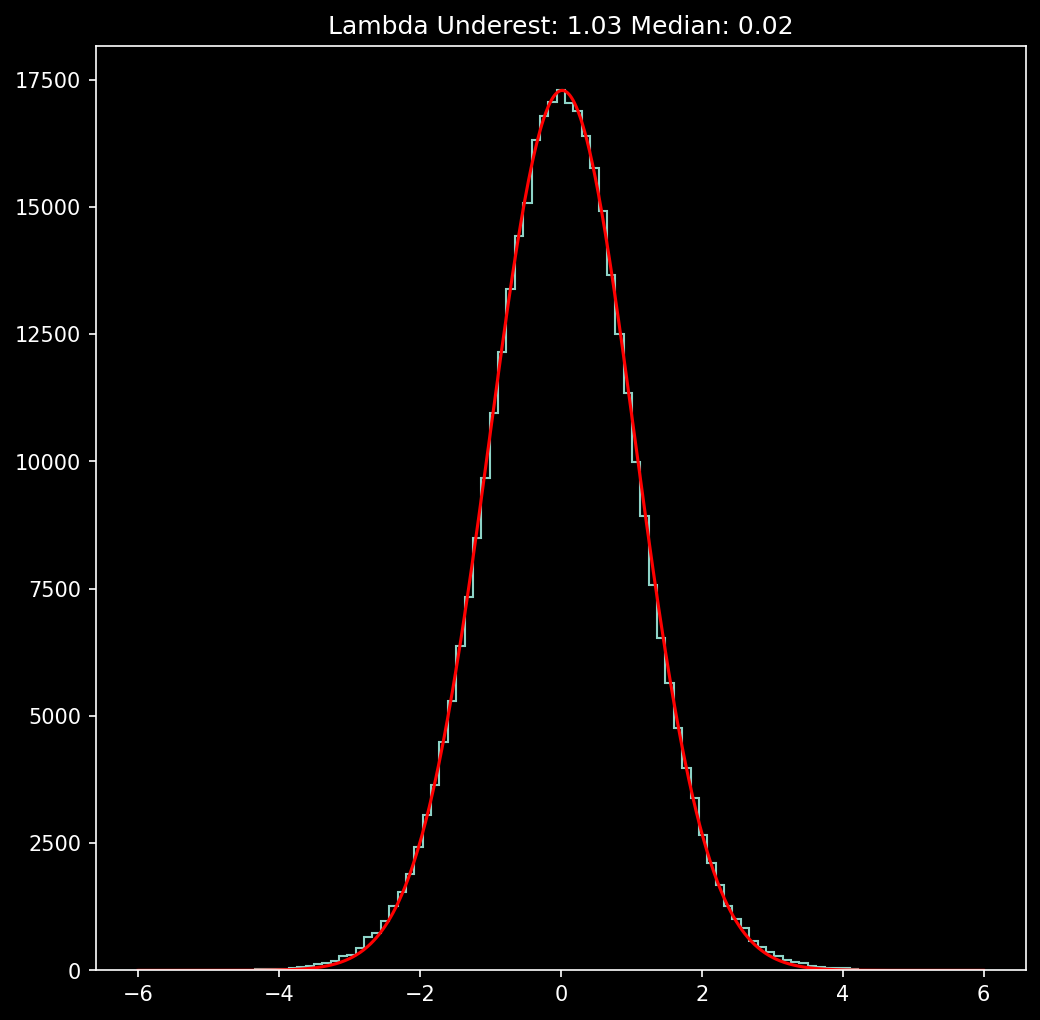

PyObject Text(0.5, 1.0, 'Lambda Underest: 1.03 Median: 0.02')

In [24]:
fig = plt.figure(figsize=(8,8),dpi=150)
ax = fig.add_subplot(1,1,1)
z = (t_out[2,msk5].-lamda_gt[msk5])./(sout_mat[19,msk5])
img = ax.hist(
    z,
    bins=101,
    range=(-6,6),
    histtype="step"
);

masknan = .!isnan.(z)
std = fiqr(z[masknan])
x = -6:0.01:6
ax.plot(x,Distributions.pdf.(Normal(median(z[masknan]),std),x).*maximum(img[1])*sqrt(2*pi)*std,color="red")
ax.set_title("Lambda Underest: "*string(round(std,digits=2))*" Median: "*string(round(median(z[masknan]),digits=2)))

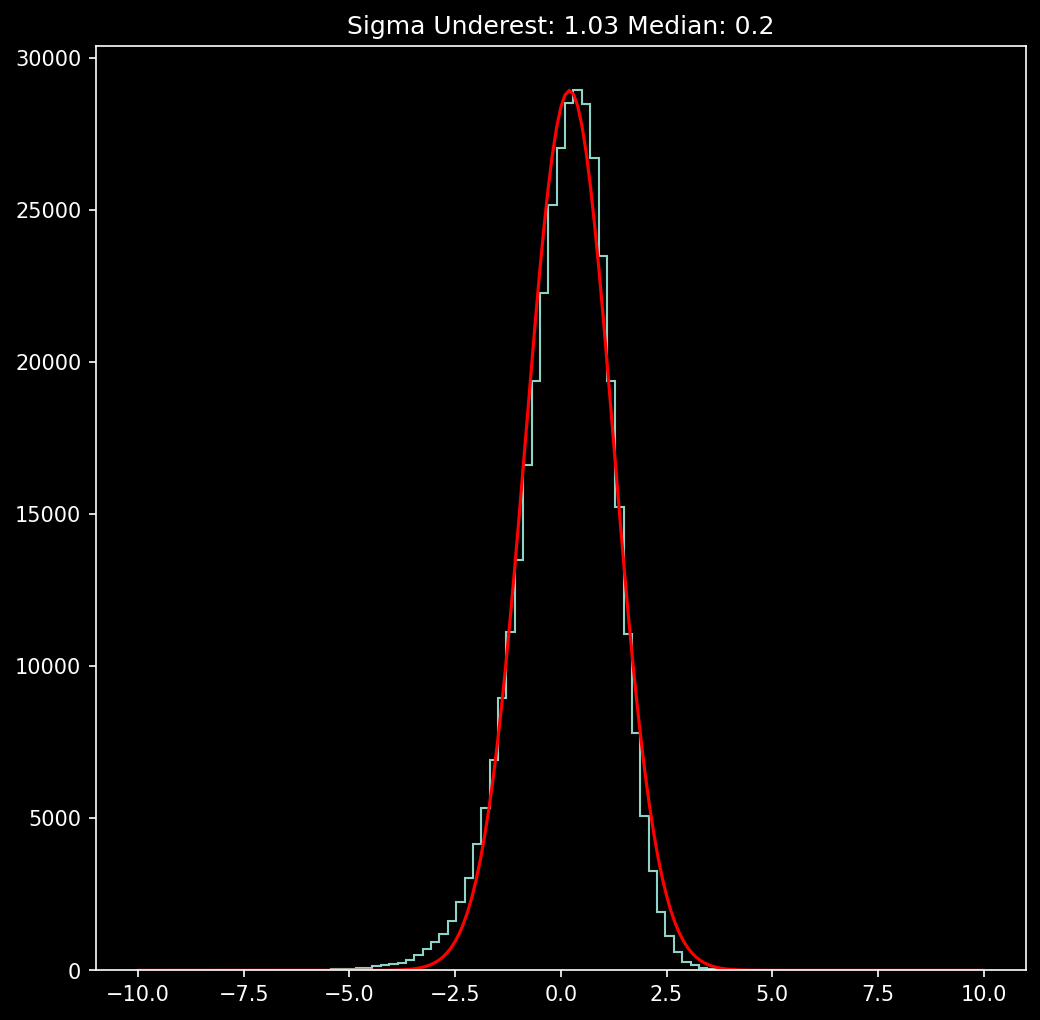

PyObject Text(0.5, 1.0, 'Sigma Underest: 1.03 Median: 0.2')

In [25]:
fig = plt.figure(figsize=(8,8),dpi=150)
ax = fig.add_subplot(1,1,1)
z = (t_out[3,msk5].-sigma_gt[msk5])./sout_mat[20,msk5]
img = ax.hist(
    z,
    bins=101,
    range=(-10,10),
    histtype="step"
);

masknan = .!isnan.(z)
std = fiqr(z[masknan])
x = -10:0.1:10
ax.plot(x,Distributions.pdf.(Normal(median(z[masknan]),std),x).*maximum(img[1])*sqrt(2*pi)*std,color="red")
ax.set_title("Sigma Underest: "*string(round(std,digits=2))*" Median: "*string(round(median(z[masknan]),digits=2)))

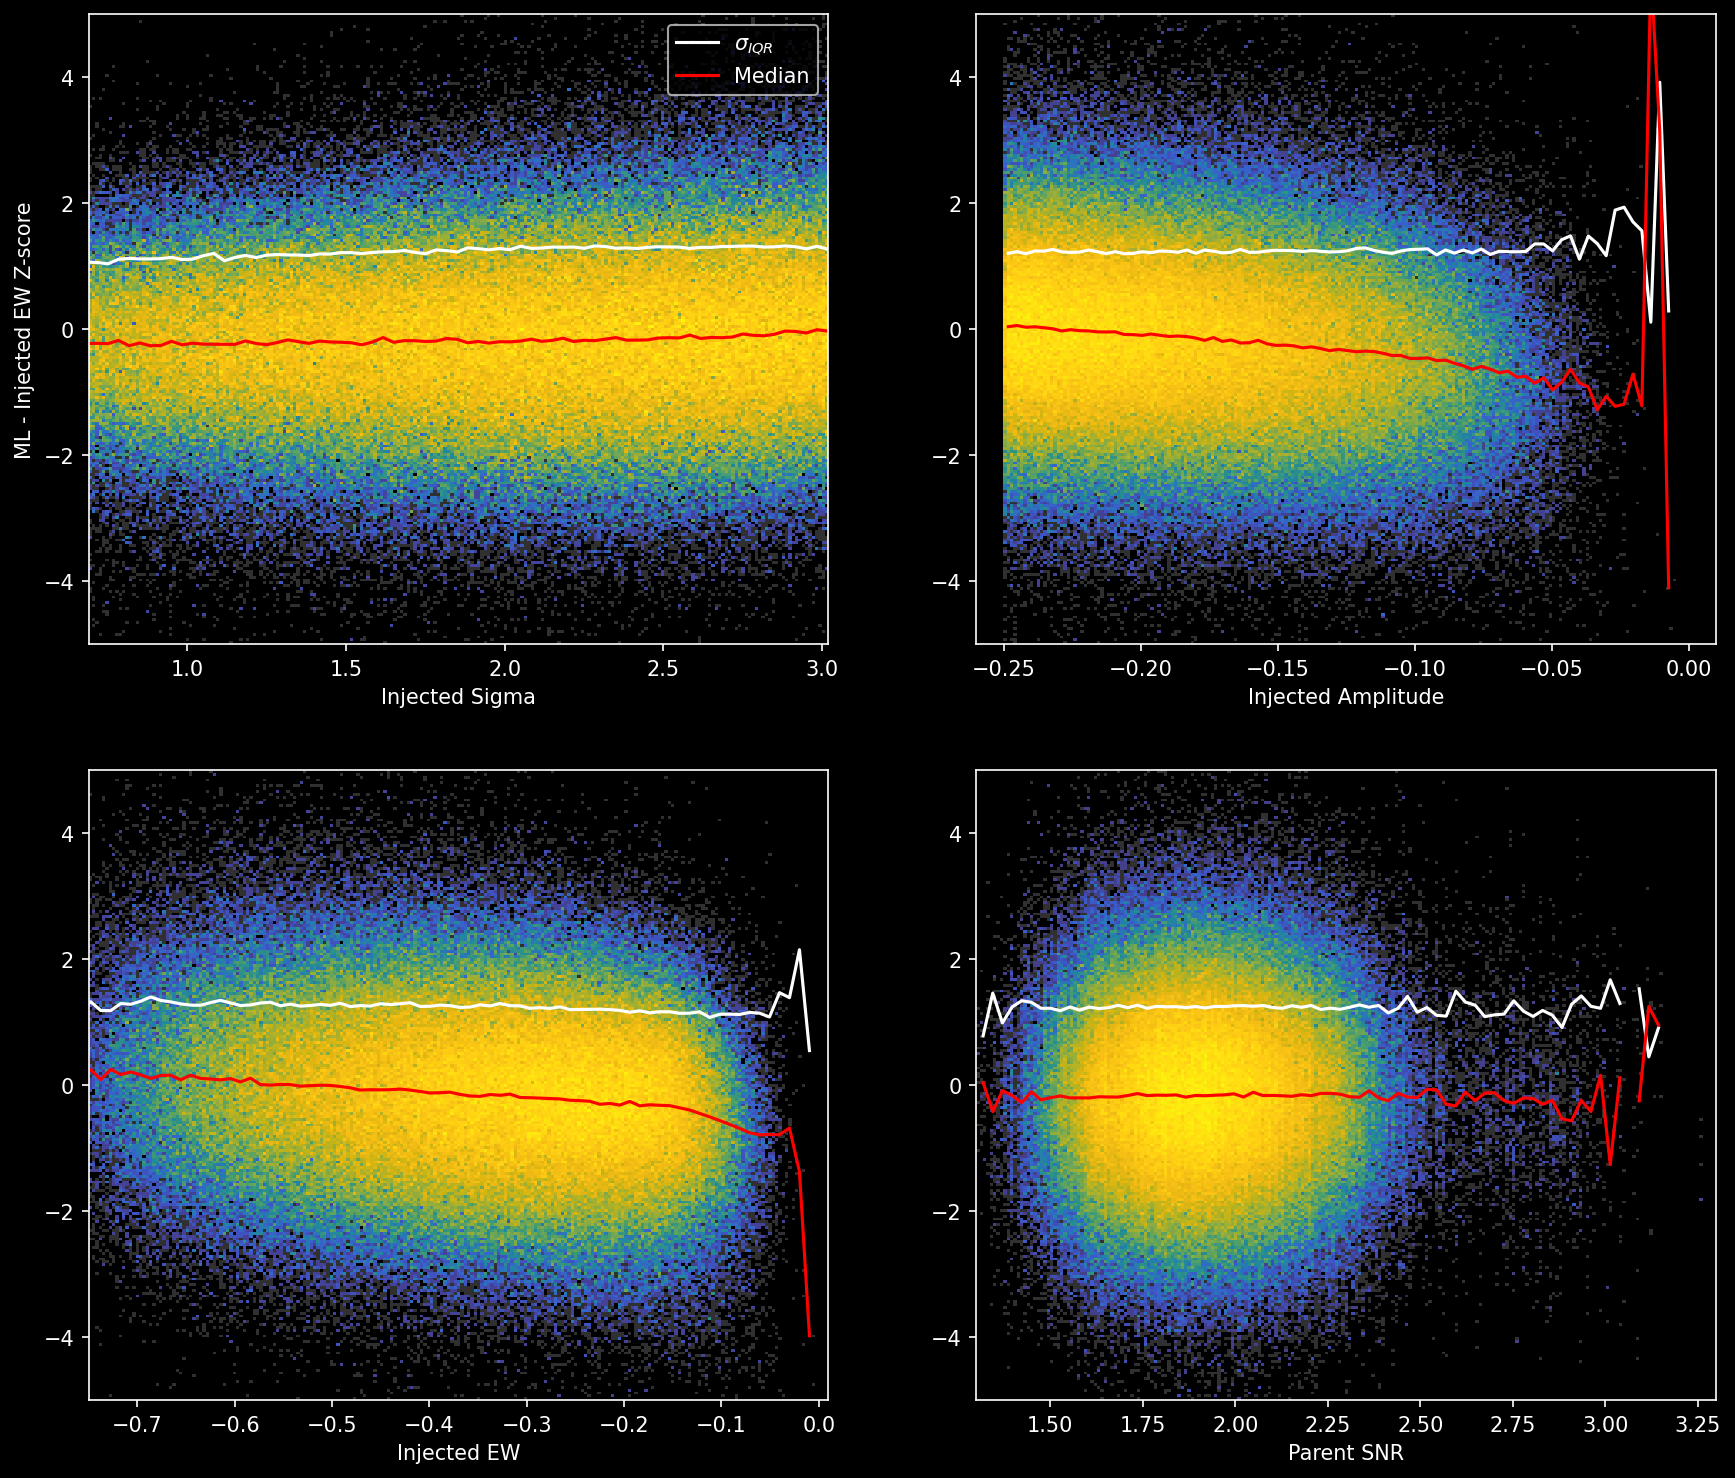

In [26]:
fig = plt.figure(figsize=(14,12),dpi=150)
fiqr(x) = iqr(x)./1.34896;

msknan = .!isnan.(err_ew)
xt = sigma_gt[msk5][msknan]
yt = ((est_ew.-gt_ew)./(err_ew))[msknan];
xlim = (mu0-2.5*sig0-0.1, mu0+2.5*sig0+0.1)
ylim = (-5,5)

ax = fig.add_subplot(2,2,1)
nbin=221
ax.hist2d(xt,yt,
    bins=(nbin,nbin),
    range=(xlim,ylim),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.set_xlim(xlim)
ax.set_ylim(ylim)

nbin=75

edges, centers, binStat = binnedStatistic(
    xt,
    yt,
    nbins=nbin,
    statistic=:f,
    f=fiqr
);

edges, centers, binStat1 = binnedStatistic(
    xt,
    yt,
    nbins=nbin,
    statistic=:median,
);

edges, centers, binCnts = binnedStatistic(
    xt,
    ones(size(xt)),
    nbins=nbin,
    statistic=:sum
);

ax.plot(
    centers,
    (binStat./binCnts).*binCnts,
    color="white",
    linestyle="-"
);

ax.plot(
    centers,
    (binStat1./binCnts).*binCnts,
    color="red",
    linestyle="-"
);
    
ax.set_xlabel("Injected Sigma")
ax.set_ylabel("ML - Injected EW Z-score")
ax.legend([L"\sigma_{IQR}","Median"])

ax = fig.add_subplot(2,2,2)
nbin=221

xt = amp_gt[msk5][msknan]
xlim = (-0.26,0.01)

ax.hist2d(xt,yt,
    bins=(nbin,nbin),
    range=(xlim,ylim),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.set_xlim(xlim)
ax.set_ylim(ylim)

nbin=75

edges, centers, binStat = binnedStatistic(
    xt,
    yt,
    nbins=nbin,
    statistic=:f,
    f=fiqr
);

edges, centers, binStat1 = binnedStatistic(
    xt,
    yt,
    nbins=nbin,
    statistic=:median,
);

edges, centers, binCnts = binnedStatistic(
    xt,
    ones(size(xt)),
    nbins=nbin,
    statistic=:sum
);

ax.plot(
    centers,
    (binStat./binCnts).*binCnts,
    color="white",
    linestyle="-"
);

ax.plot(
    centers,
    (binStat1./binCnts).*binCnts,
    color="red",
    linestyle="-"
);
    
ax.set_xlabel("Injected Amplitude")

ax = fig.add_subplot(2,2,3)
nbin=221

xt = (amp_gt[msk5].*sigma_gt[msk5])[msknan]
xlim = (-0.75,0.01)

ax.hist2d(xt,yt,
    bins=(nbin,nbin),
    range=(xlim,ylim),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.set_xlim(xlim)
ax.set_ylim(ylim)

nbin=75

edges, centers, binStat = binnedStatistic(
    xt,
    yt,
    nbins=nbin,
    statistic=:f,
    f=fiqr
);

edges, centers, binStat1 = binnedStatistic(
    xt,
    yt,
    nbins=nbin,
    statistic=:median,
);

edges, centers, binCnts = binnedStatistic(
    xt,
    ones(size(xt)),
    nbins=nbin,
    statistic=:sum
);

ax.plot(
    centers,
    (binStat./binCnts).*binCnts,
    color="white",
    linestyle="-"
);

ax.plot(
    centers,
    (binStat1./binCnts).*binCnts,
    color="red",
    linestyle="-"
);
    
ax.set_xlabel("Injected EW")

ax = fig.add_subplot(2,2,4)
nbin=221

xt = log10.(SNR_gt[msk5][msknan])
xlim = (1.3,3.3)

ax.hist2d(xt,yt,
    bins=(nbin,nbin),
    range=(xlim,ylim),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.set_xlim(xlim)
ax.set_ylim(ylim)

nbin=75

edges, centers, binStat = binnedStatistic(
    xt,
    yt,
    nbins=nbin,
    statistic=:f,
    f=fiqr
);

edges, centers, binStat1 = binnedStatistic(
    xt,
    yt,
    nbins=nbin,
    statistic=:median,
);

edges, centers, binCnts = binnedStatistic(
    xt,
    ones(size(xt)),
    nbins=nbin,
    statistic=:sum
);

ax.plot(
    centers,
    (binStat./binCnts).*binCnts,
    color="white",
    linestyle="-"
);

ax.plot(
    centers,
    (binStat1./binCnts).*binCnts,
    color="red",
    linestyle="-"
);
    
ax.set_xlabel("Parent SNR");

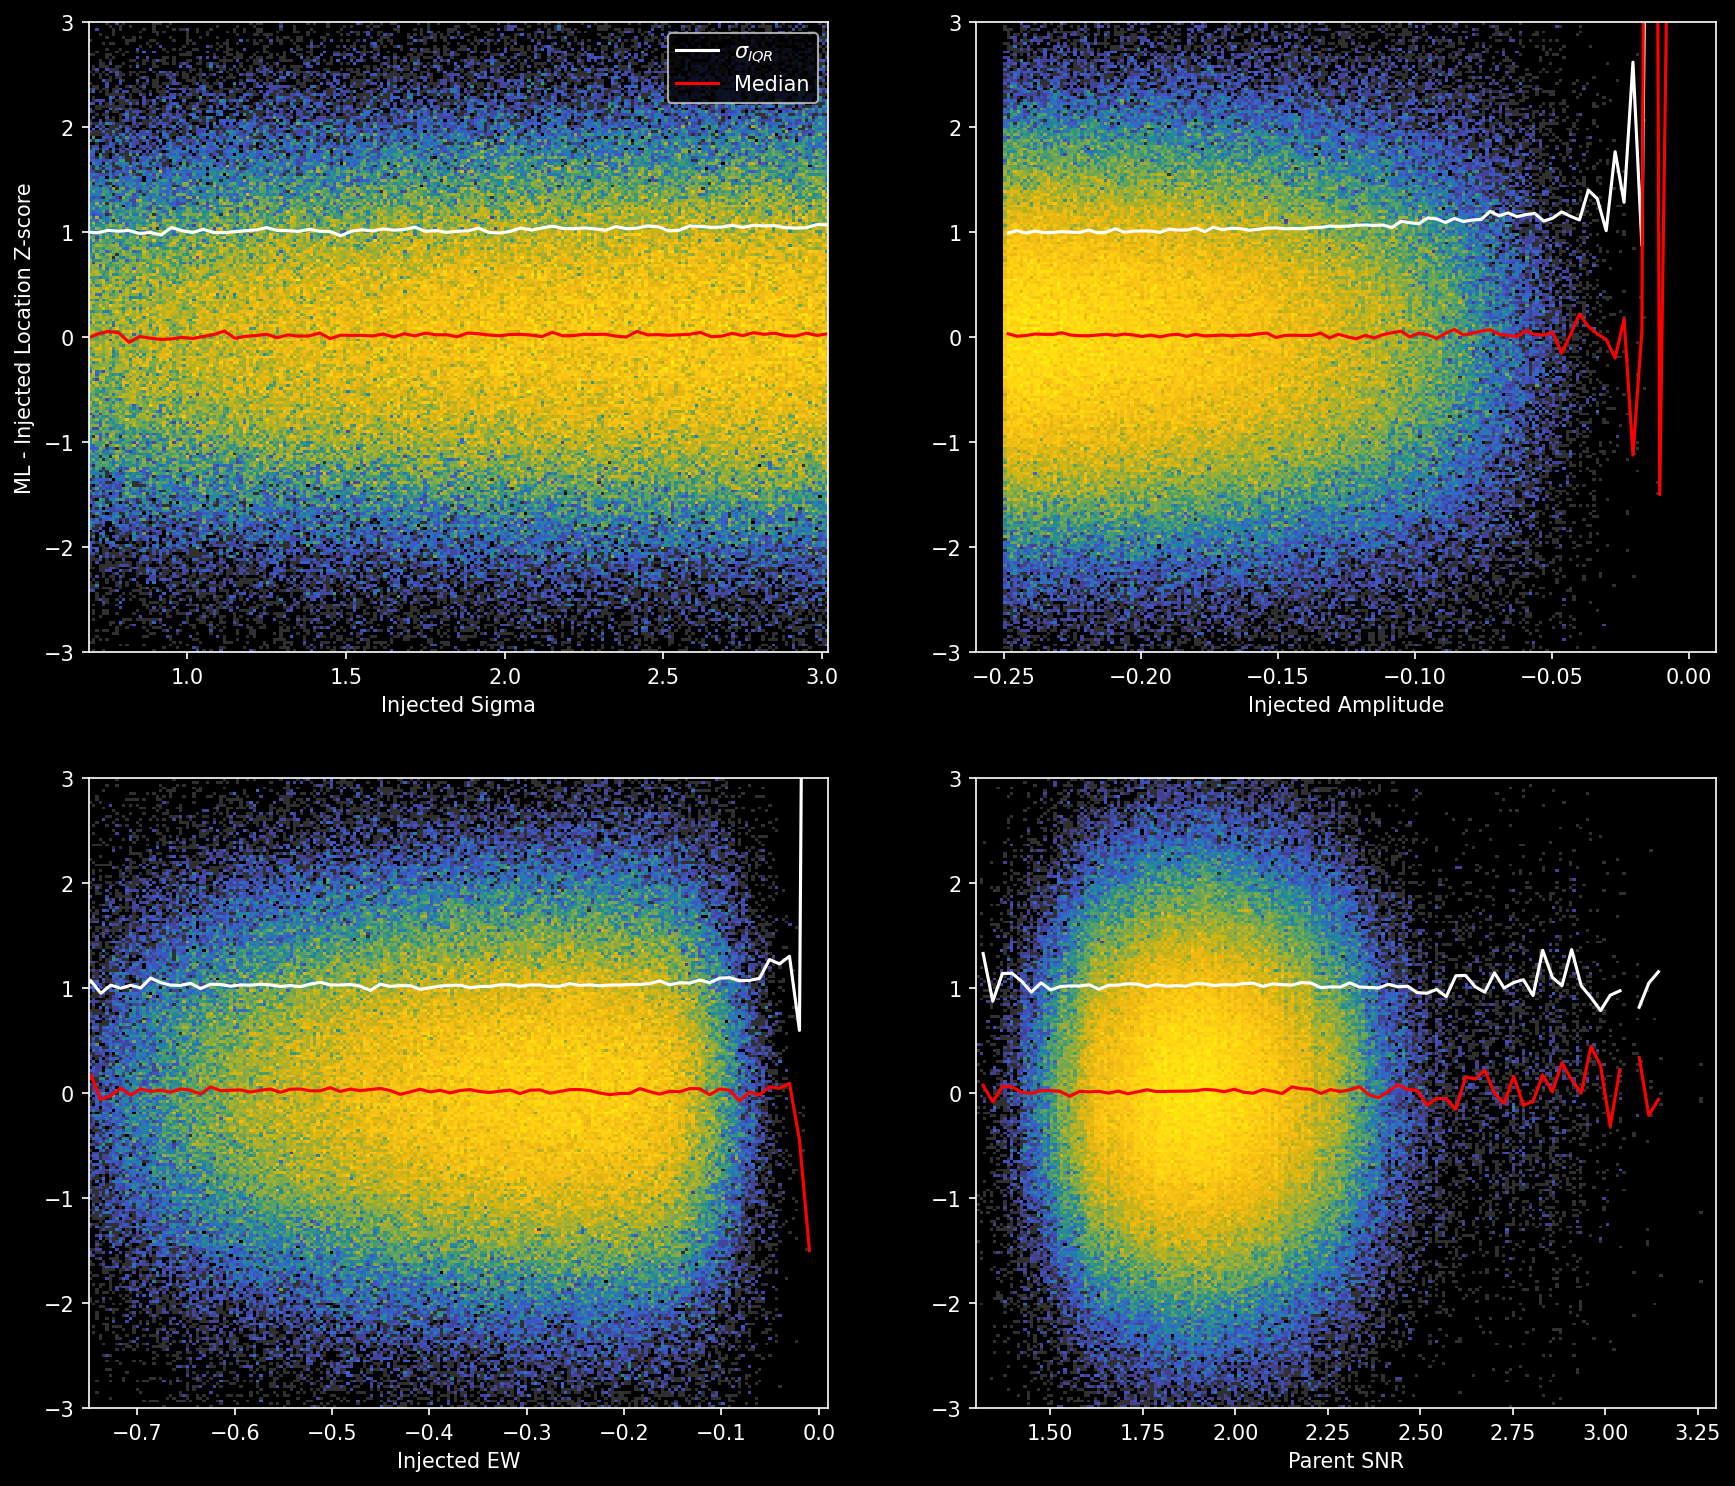

PyObject Text(0.5, 35.0, 'Parent SNR')

In [27]:
fig = plt.figure(figsize=(14,12),dpi=150)
fiqr(x) = iqr(x)./1.34896;

msknan = (sout_mat[19,msk5].>0)
xt = sigma_gt[msk5][msknan]
yt = ((t_out[2,msk5].-lamda_gt[msk5])./sout_mat[19,msk5])[msknan]
xlim = (mu0-2.5*sig0-0.1, mu0+2.5*sig0+0.1)
ylim = (-3,3)

ax = fig.add_subplot(2,2,1)
nbin=221
ax.hist2d(xt,yt,
    bins=(nbin,nbin),
    range=(xlim,ylim),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.set_xlim(xlim)
ax.set_ylim(ylim)

nbin=75

edges, centers, binStat = binnedStatistic(
    xt,
    yt,
    nbins=nbin,
    statistic=:f,
    f=fiqr
);

edges, centers, binStat1 = binnedStatistic(
    xt,
    yt,
    nbins=nbin,
    statistic=:median,
);

edges, centers, binCnts = binnedStatistic(
    xt,
    ones(size(xt)),
    nbins=nbin,
    statistic=:sum
);

ax.plot(
    centers,
    (binStat./binCnts).*binCnts,
    color="white",
    linestyle="-"
);

ax.plot(
    centers,
    (binStat1./binCnts).*binCnts,
    color="red",
    linestyle="-"
);
    
ax.set_xlabel("Injected Sigma")
ax.set_ylabel("ML - Injected Location Z-score")
ax.legend([L"\sigma_{IQR}","Median"])

ax = fig.add_subplot(2,2,2)
nbin=221

xt = amp_gt[msk5][msknan]
xlim = (-0.26,0.01)

ax.hist2d(xt,yt,
    bins=(nbin,nbin),
    range=(xlim,ylim),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.set_xlim(xlim)
ax.set_ylim(ylim)

nbin=75

edges, centers, binStat = binnedStatistic(
    xt,
    yt,
    nbins=nbin,
    statistic=:f,
    f=fiqr
);

edges, centers, binStat1 = binnedStatistic(
    xt,
    yt,
    nbins=nbin,
    statistic=:median,
);

edges, centers, binCnts = binnedStatistic(
    xt,
    ones(size(xt)),
    nbins=nbin,
    statistic=:sum
);

ax.plot(
    centers,
    (binStat./binCnts).*binCnts,
    color="white",
    linestyle="-"
);

ax.plot(
    centers,
    (binStat1./binCnts).*binCnts,
    color="red",
    linestyle="-"
);
    
ax.set_xlabel("Injected Amplitude")

ax = fig.add_subplot(2,2,3)
nbin=221

xt = (amp_gt[msk5].*sigma_gt[msk5])[msknan]
xlim = (-0.75,0.01)

ax.hist2d(xt,yt,
    bins=(nbin,nbin),
    range=(xlim,ylim),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.set_xlim(xlim)
ax.set_ylim(ylim)

nbin=75

edges, centers, binStat = binnedStatistic(
    xt,
    yt,
    nbins=nbin,
    statistic=:f,
    f=fiqr
);

edges, centers, binStat1 = binnedStatistic(
    xt,
    yt,
    nbins=nbin,
    statistic=:median,
);

edges, centers, binCnts = binnedStatistic(
    xt,
    ones(size(xt)),
    nbins=nbin,
    statistic=:sum
);

ax.plot(
    centers,
    (binStat./binCnts).*binCnts,
    color="white",
    linestyle="-"
);

ax.plot(
    centers,
    (binStat1./binCnts).*binCnts,
    color="red",
    linestyle="-"
);
    
ax.set_xlabel("Injected EW")

ax = fig.add_subplot(2,2,4)
nbin=221

xt = log10.(SNR_gt[msk5])[msknan]
xlim = (1.3,3.3)

ax.hist2d(xt,yt,
    bins=(nbin,nbin),
    range=(xlim,ylim),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.set_xlim(xlim)
ax.set_ylim(ylim)

nbin=75

edges, centers, binStat = binnedStatistic(
    xt,
    yt,
    nbins=nbin,
    statistic=:f,
    f=fiqr
);

edges, centers, binStat1 = binnedStatistic(
    xt,
    yt,
    nbins=nbin,
    statistic=:median,
);

edges, centers, binCnts = binnedStatistic(
    xt,
    ones(size(xt)),
    nbins=nbin,
    statistic=:sum
);

ax.plot(
    centers,
    (binStat./binCnts).*binCnts,
    color="white",
    linestyle="-"
);

ax.plot(
    centers,
    (binStat1./binCnts).*binCnts,
    color="red",
    linestyle="-"
);
    
ax.set_xlabel("Parent SNR")

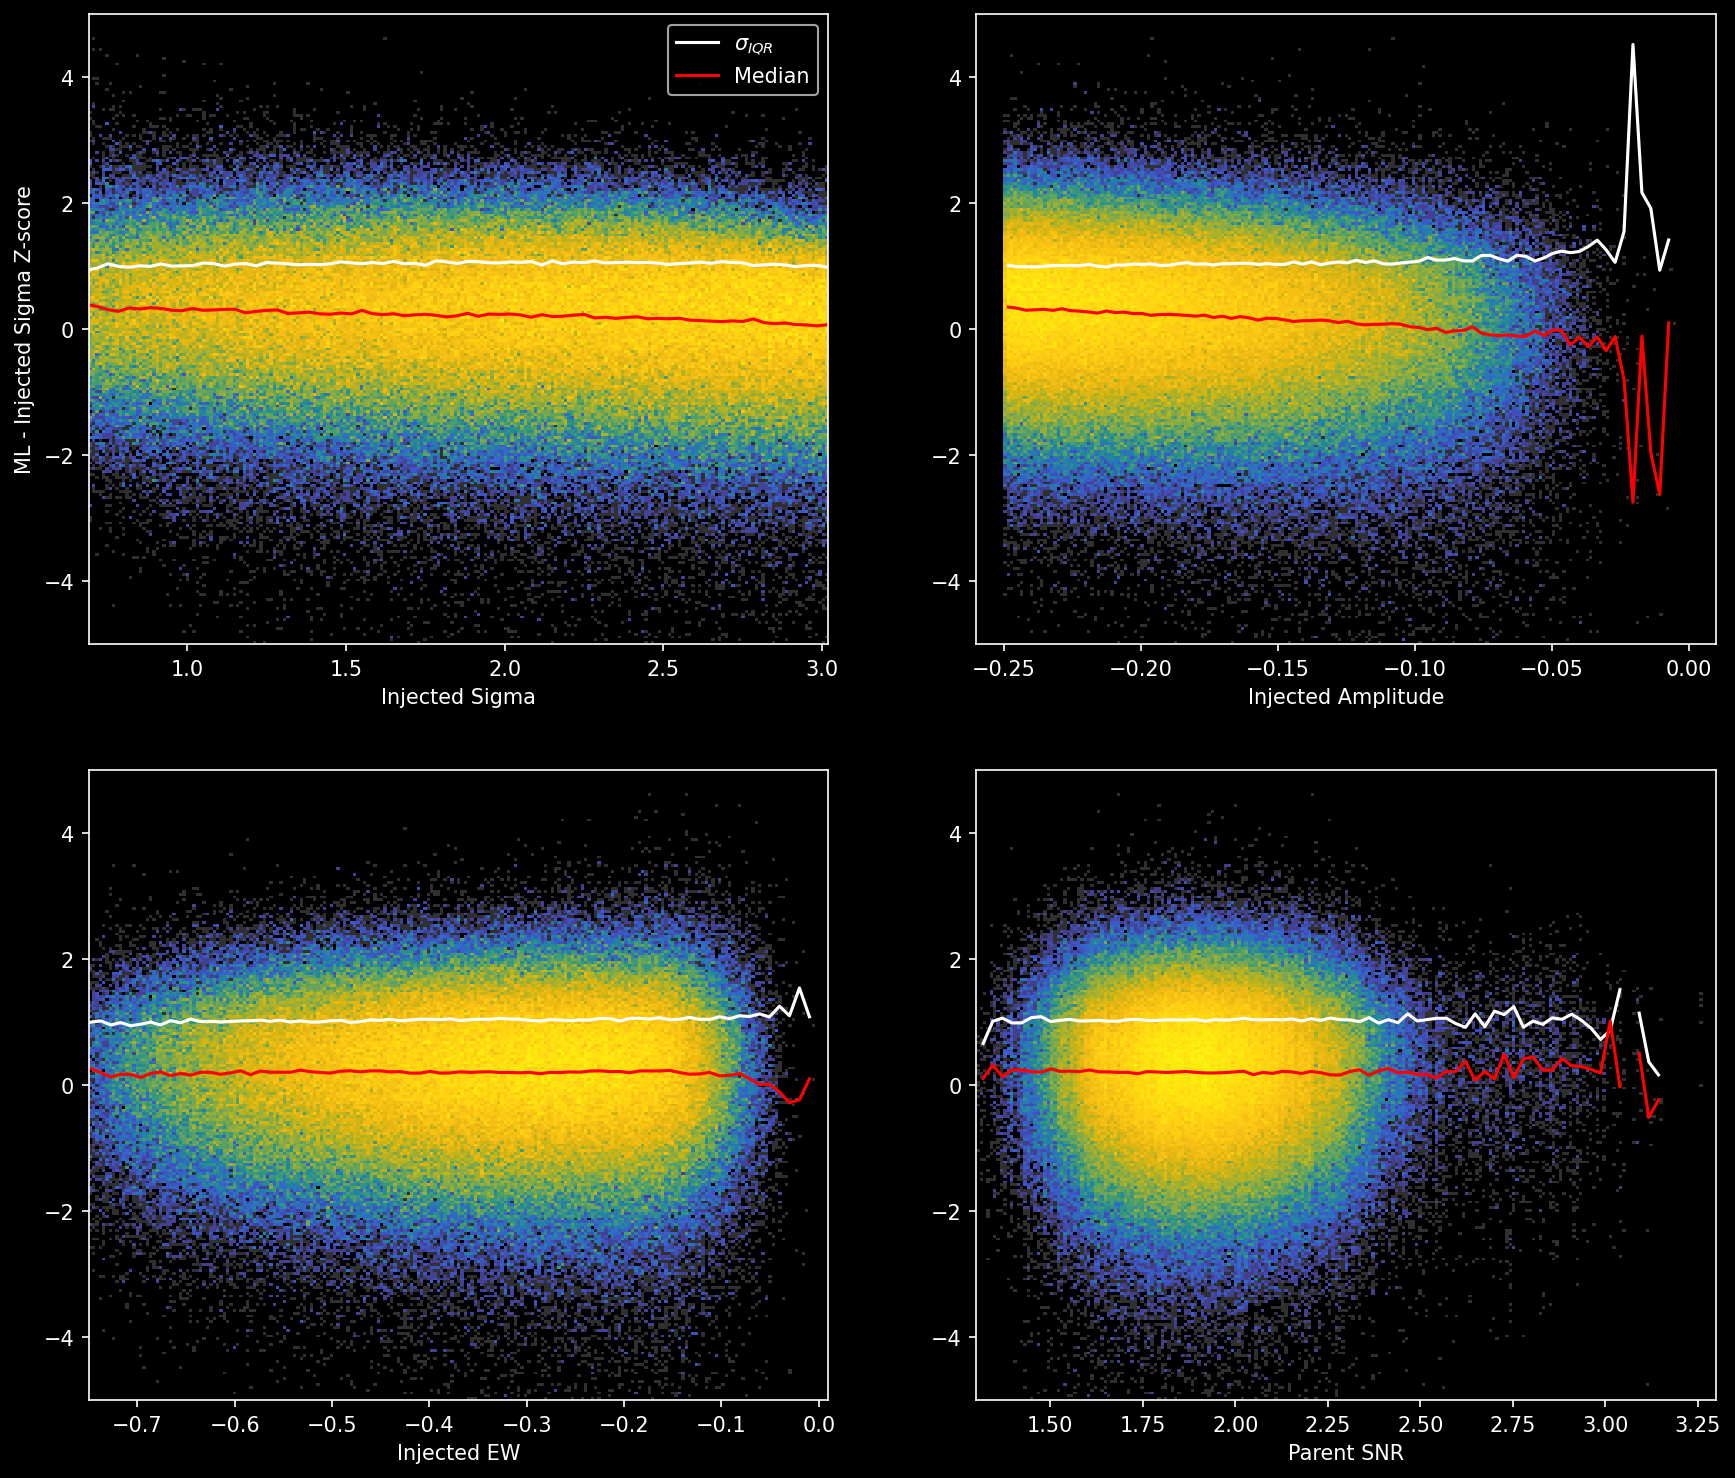

PyObject Text(0.5, 35.0, 'Parent SNR')

In [28]:
fig = plt.figure(figsize=(14,12),dpi=150)
fiqr(x) = iqr(x)./1.34896;

msknan = (sout_mat[20,msk5].>0)
xt = sigma_gt[msk5][msknan]
yt = ((t_out[3,msk5].-sigma_gt[msk5])./sout_mat[20,msk5])[msknan]
xlim = (mu0-2.5*sig0-0.1, mu0+2.5*sig0+0.1)
ylim = (-5,5)

ax = fig.add_subplot(2,2,1)
nbin=221
ax.hist2d(xt,yt,
    bins=(nbin,nbin),
    range=(xlim,ylim),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.set_xlim(xlim)
ax.set_ylim(ylim)

nbin=75

edges, centers, binStat = binnedStatistic(
    xt,
    yt,
    nbins=nbin,
    statistic=:f,
    f=fiqr
);

edges, centers, binStat1 = binnedStatistic(
    xt,
    yt,
    nbins=nbin,
    statistic=:median,
);

edges, centers, binCnts = binnedStatistic(
    xt,
    ones(size(xt)),
    nbins=nbin,
    statistic=:sum
);

ax.plot(
    centers,
    (binStat./binCnts).*binCnts,
    color="white",
    linestyle="-"
);

ax.plot(
    centers,
    (binStat1./binCnts).*binCnts,
    color="red",
    linestyle="-"
);
    
ax.set_xlabel("Injected Sigma")
ax.set_ylabel("ML - Injected Sigma Z-score")
ax.legend([L"\sigma_{IQR}","Median"])

ax = fig.add_subplot(2,2,2)
nbin=221

xt = amp_gt[msk5][msknan]
xlim = (-0.26,0.01)

ax.hist2d(xt,yt,
    bins=(nbin,nbin),
    range=(xlim,ylim),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.set_xlim(xlim)
ax.set_ylim(ylim)

nbin=75

edges, centers, binStat = binnedStatistic(
    xt,
    yt,
    nbins=nbin,
    statistic=:f,
    f=fiqr
);

edges, centers, binStat1 = binnedStatistic(
    xt,
    yt,
    nbins=nbin,
    statistic=:median,
);

edges, centers, binCnts = binnedStatistic(
    xt,
    ones(size(xt)),
    nbins=nbin,
    statistic=:sum
);

ax.plot(
    centers,
    (binStat./binCnts).*binCnts,
    color="white",
    linestyle="-"
);

ax.plot(
    centers,
    (binStat1./binCnts).*binCnts,
    color="red",
    linestyle="-"
);
    
ax.set_xlabel("Injected Amplitude")

ax = fig.add_subplot(2,2,3)
nbin=221

xt = (amp_gt[msk5].*sigma_gt[msk5])[msknan]
xlim = (-0.75,0.01)

ax.hist2d(xt,yt,
    bins=(nbin,nbin),
    range=(xlim,ylim),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.set_xlim(xlim)
ax.set_ylim(ylim)

nbin=75

edges, centers, binStat = binnedStatistic(
    xt,
    yt,
    nbins=nbin,
    statistic=:f,
    f=fiqr
);

edges, centers, binStat1 = binnedStatistic(
    xt,
    yt,
    nbins=nbin,
    statistic=:median,
);

edges, centers, binCnts = binnedStatistic(
    xt,
    ones(size(xt)),
    nbins=nbin,
    statistic=:sum
);

ax.plot(
    centers,
    (binStat./binCnts).*binCnts,
    color="white",
    linestyle="-"
);

ax.plot(
    centers,
    (binStat1./binCnts).*binCnts,
    color="red",
    linestyle="-"
);
    
ax.set_xlabel("Injected EW")

ax = fig.add_subplot(2,2,4)
nbin=221

xt = log10.(SNR_gt[msk5])[msknan]
xlim = (1.3,3.3)

ax.hist2d(xt,yt,
    bins=(nbin,nbin),
    range=(xlim,ylim),
    cmap="cet_gouldian",
    norm=mplcolors.LogNorm()
);

ax.set_xlim(xlim)
ax.set_ylim(ylim)

nbin=75

edges, centers, binStat = binnedStatistic(
    xt,
    yt,
    nbins=nbin,
    statistic=:f,
    f=fiqr
);

edges, centers, binStat1 = binnedStatistic(
    xt,
    yt,
    nbins=nbin,
    statistic=:median,
);

edges, centers, binCnts = binnedStatistic(
    xt,
    ones(size(xt)),
    nbins=nbin,
    statistic=:sum
);

ax.plot(
    centers,
    (binStat./binCnts).*binCnts,
    color="white",
    linestyle="-"
);

ax.plot(
    centers,
    (binStat1./binCnts).*binCnts,
    color="red",
    linestyle="-"
);
    
ax.set_xlabel("Parent SNR")